# Forecast Crash Risk with readability measures

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, learning_curve, GridSearchCV, train_test_split, learning_curve
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

import random
seed = random.seed(6) # to maintain the results

**Read data**

In [3]:
dataset = pd.read_csv("Companies.csv", sep=';', encoding = "ISO-8859-1") # , index_col = 0

In [4]:
cols = dataset.iloc[:,4:].columns
for col in cols:
    dataset[col] = dataset[col].astype(str).str.replace(",", ".").astype(float)
    
dataset = dataset.drop(labels= ['cik', 'company', 'year', 'date'], axis =1)    
dataset = shuffle(dataset)

#dataset['company_nmr'] = LabelEncoder().fit_transform(dataset['company'].astype(str)).astype('uint64')

#dataset['date'] = pd.to_datetime(dataset['date'], format='%Y%m%d')
#dataset['date_day_nmr'] = (dataset['date'] - dataset['date'].min())  / np.timedelta64(1,'D')

**Normalize between 0 and 1**

In [5]:
cols = dataset.columns
x = dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset.values)
dataset = pd.DataFrame(x_scaled)
dataset.columns = cols

****DISPLAYING SAMPLE DATAFRAME****

In [6]:
dataset.head(n = 10)

,ARI,ARI.simple,ARI.NRI,Bormuth.MC,Bormuth.GP,Coleman,Coleman.C2,Coleman.Liau.ECP,Coleman.Liau.grade,Coleman.Liau.short,...,Spache.old,Strain,Traenkle.Bailer,Traenkle.Bailer.2,Wheeler.Smith,meanSentenceLength,meanWordSyllables,NCSKEW,DUVOL,CRASH_COUNT
0,0.698010,0.699198,0.693393,0.277408,0.539744,0.615792,0.537776,0.577112,0.422888,0.422920,...,0.640158,0.722732,0.285719,0.606597,0.685306,0.722827,0.477561,0.350426,0.285696,0.272727
1,0.264505,0.266283,0.268526,0.695861,0.131937,0.398092,0.446810,0.493252,0.506748,0.506743,...,0.242245,0.294117,0.716804,0.499147,0.296619,0.302238,0.569729,0.062491,0.157113,0.363636
2,0.229339,0.228354,0.272517,0.785456,0.082226,0.298011,0.390793,0.149964,0.850036,0.850031,...,0.222589,0.220447,0.768431,0.104336,0.216846,0.210902,0.798308,0.462264,0.505869,0.454545
3,0.371856,0.375113,0.351494,0.560221,0.236591,0.771738,0.774900,0.707660,0.292340,0.292342,...,0.319882,0.404896,0.598225,0.723286,0.351715,0.439485,0.301522,0.402894,0.406892,0.272727
4,0.219662,0.221277,0.227634,0.744748,0.110179,0.467459,0.541128,0.462945,0.537055,0.537044,...,0.342354,0.262370,0.763945,0.493006,0.229753,0.254181,0.751338,0.463301,0.491504,0.454545
5,0.362378,0.362360,0.387205,0.633758,0.175162,0.413274,0.436108,0.299686,0.700314,0.700325,...,0.346810,0.373084,0.633965,0.349636,0.359680,0.363338,0.693787,0.402947,0.458017,0.272727
6,0.464631,0.466057,0.465758,0.503909,0.283491,0.577634,0.557837,0.512555,0.487445,0.487461,...,0.410901,0.497670,0.520002,0.549124,0.458741,0.494776,0.573998,0.410440,0.446939,0.272727
7,0.332070,0.335417,0.312023,0.598043,0.203357,0.789100,0.806309,0.705630,0.294370,0.294368,...,0.296120,0.371629,0.635916,0.710143,0.309571,0.401597,0.346268,0.522867,0.599302,0.454545
8,0.278807,0.283091,0.247998,0.632787,0.175735,0.795714,0.826240,0.804806,0.195194,0.195184,...,0.283237,0.331477,0.682137,0.798791,0.274051,0.367512,0.302695,0.457290,0.541271,0.454545
9,0.343032,0.345147,0.339410,0.611287,0.191780,0.636288,0.655099,0.556950,0.443050,0.443053,...,0.325700,0.366872,0.635596,0.585049,0.332256,0.387469,0.427450,0.604296,0.626733,0.454545


## Correlation of features

**Correlation Heatmap Of Features with Each other and With Financial Distress**

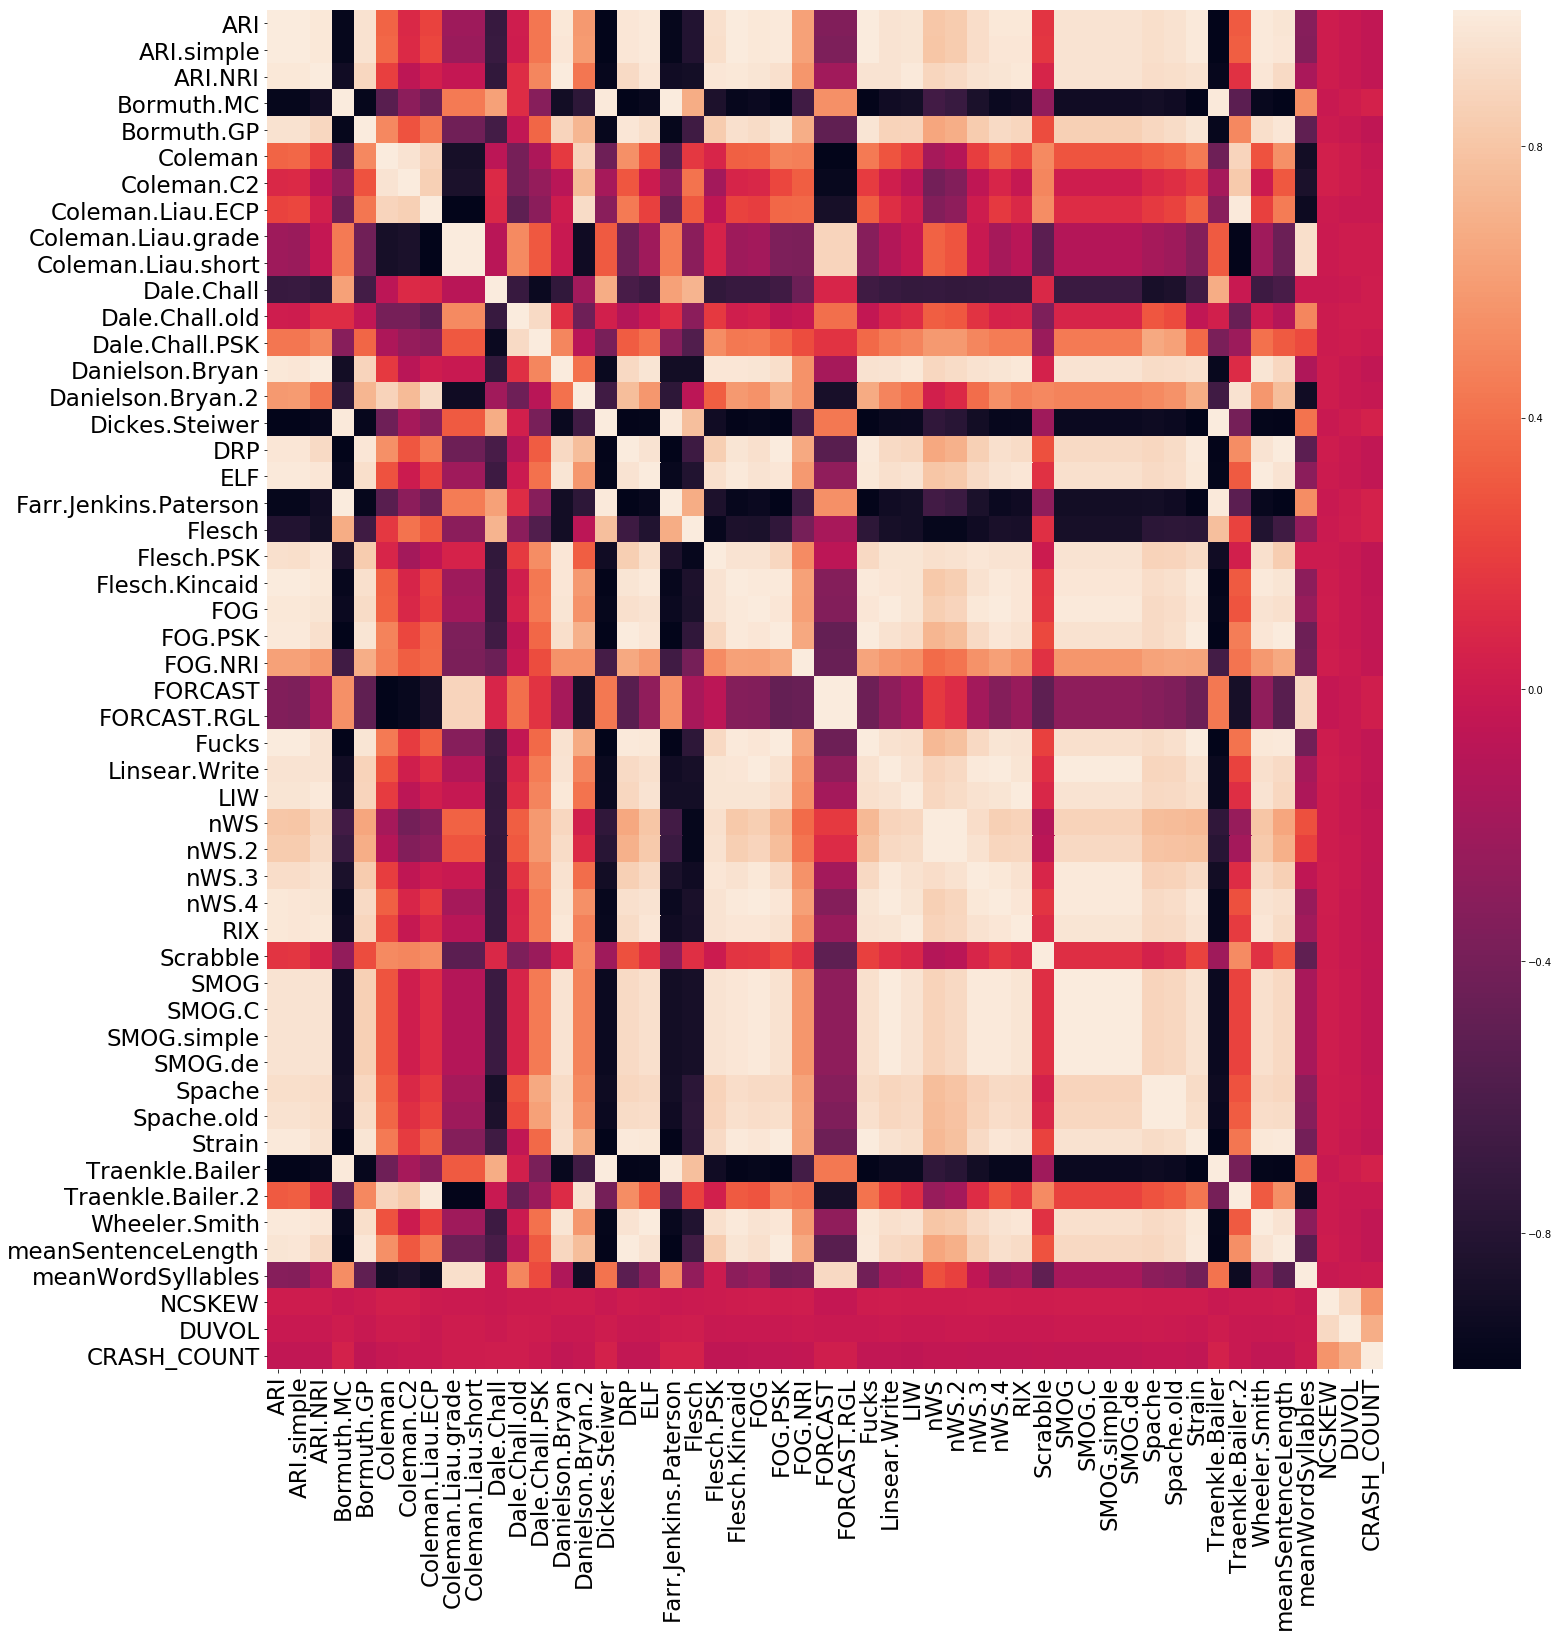

In [7]:
correlation = dataset.corr()
f, ax = plt.subplots(figsize= (25,25))
sns.heatmap(correlation)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.show()

**Bar Plot of Correlation Matrix**

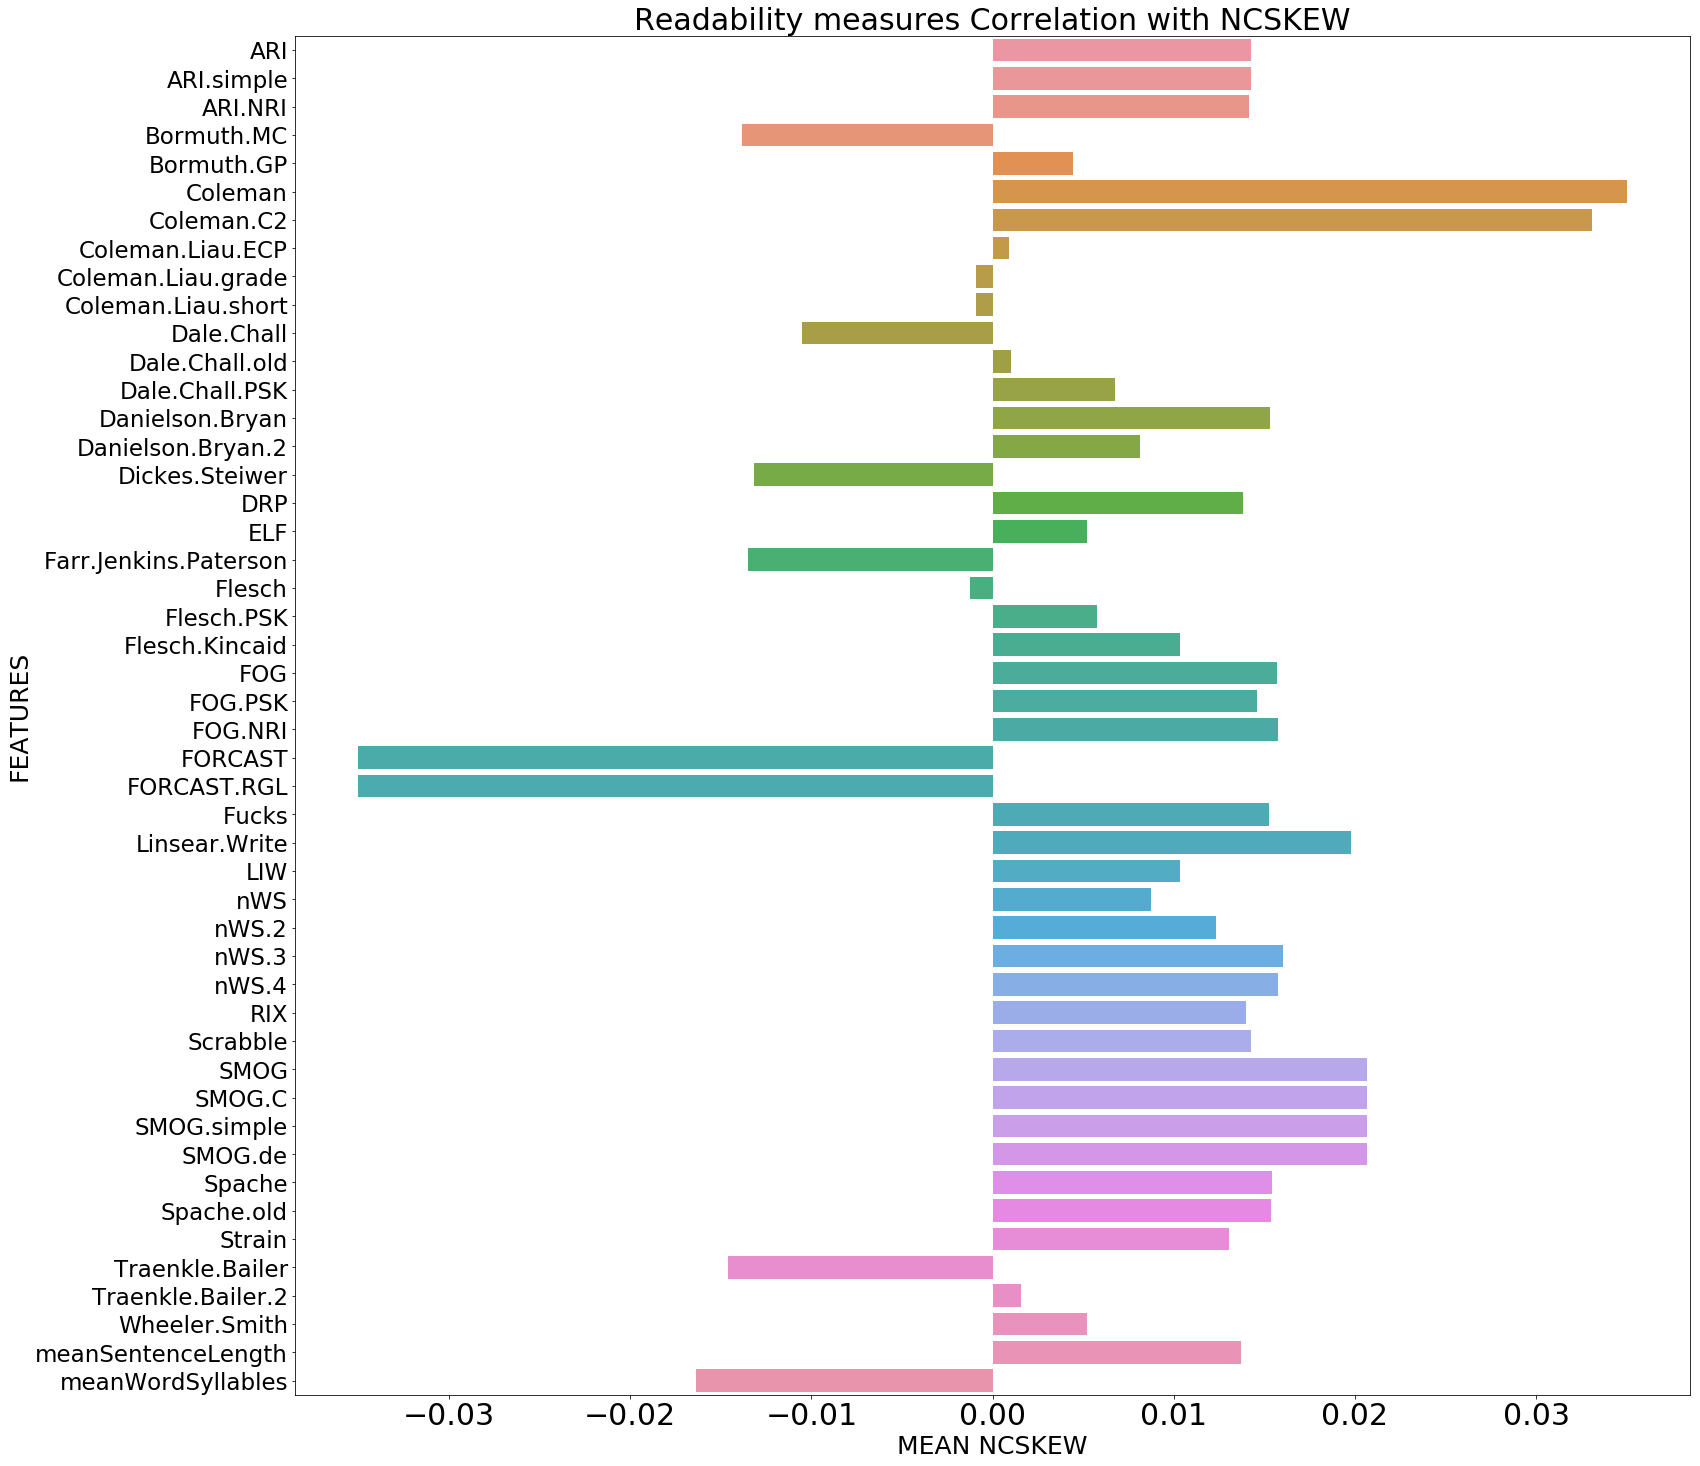

In [8]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = correlation['NCSKEW'][:48], y = correlation.index[:48])
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 23)
plt.ylabel('FEATURES', fontsize= 25)
plt.xlabel('MEAN NCSKEW', fontsize= 25)
plt.title('Readability measures Correlation with NCSKEW', fontsize =30)
plt.show()

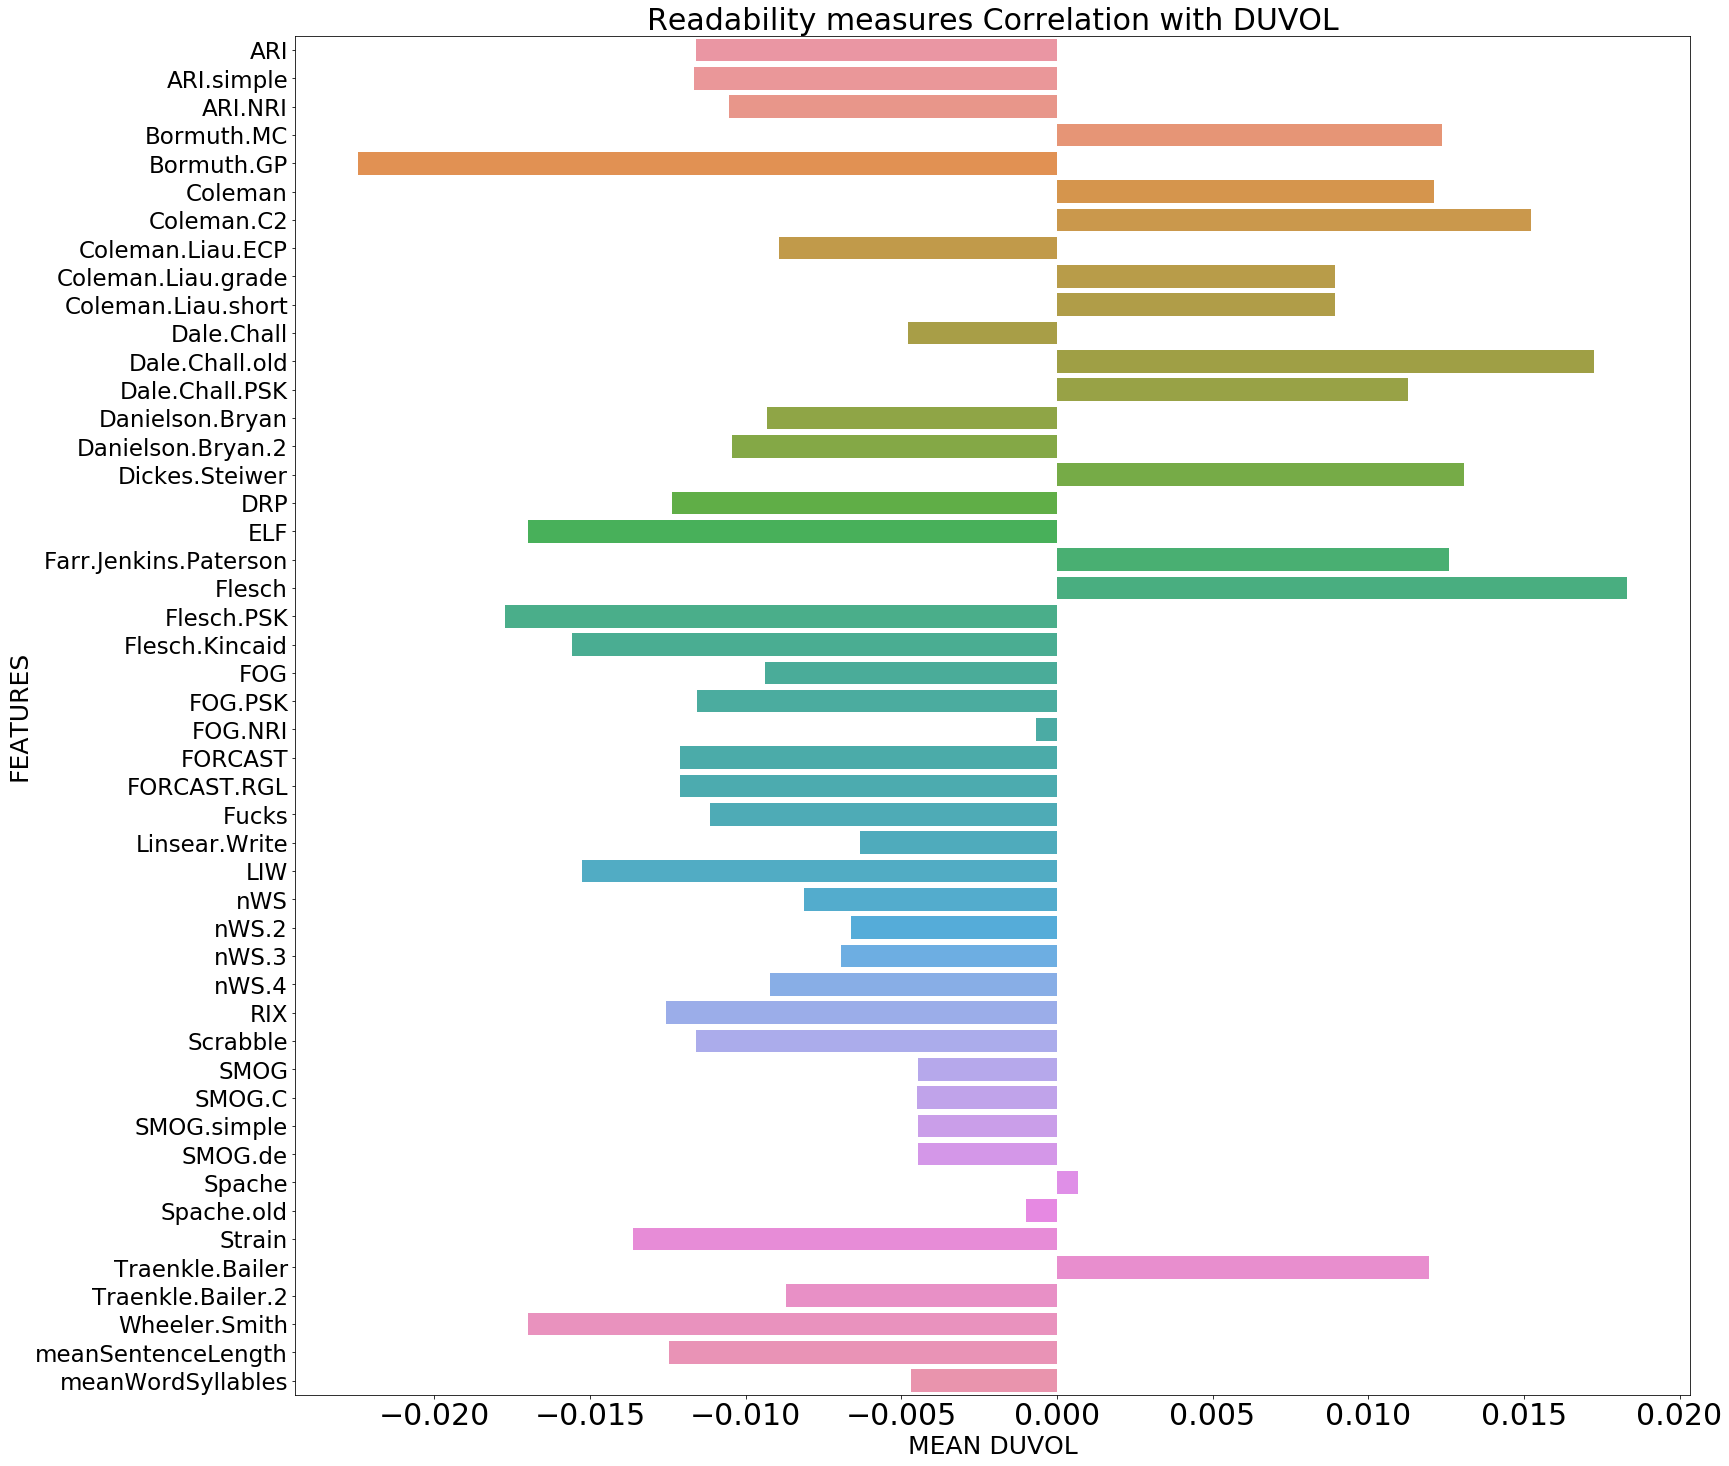

In [9]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = correlation['DUVOL'][:48], y = correlation.index[:48])
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 23)
plt.ylabel('FEATURES', fontsize= 25)
plt.xlabel('MEAN DUVOL', fontsize= 25)
plt.title('Readability measures Correlation with DUVOL', fontsize =30)
plt.show()

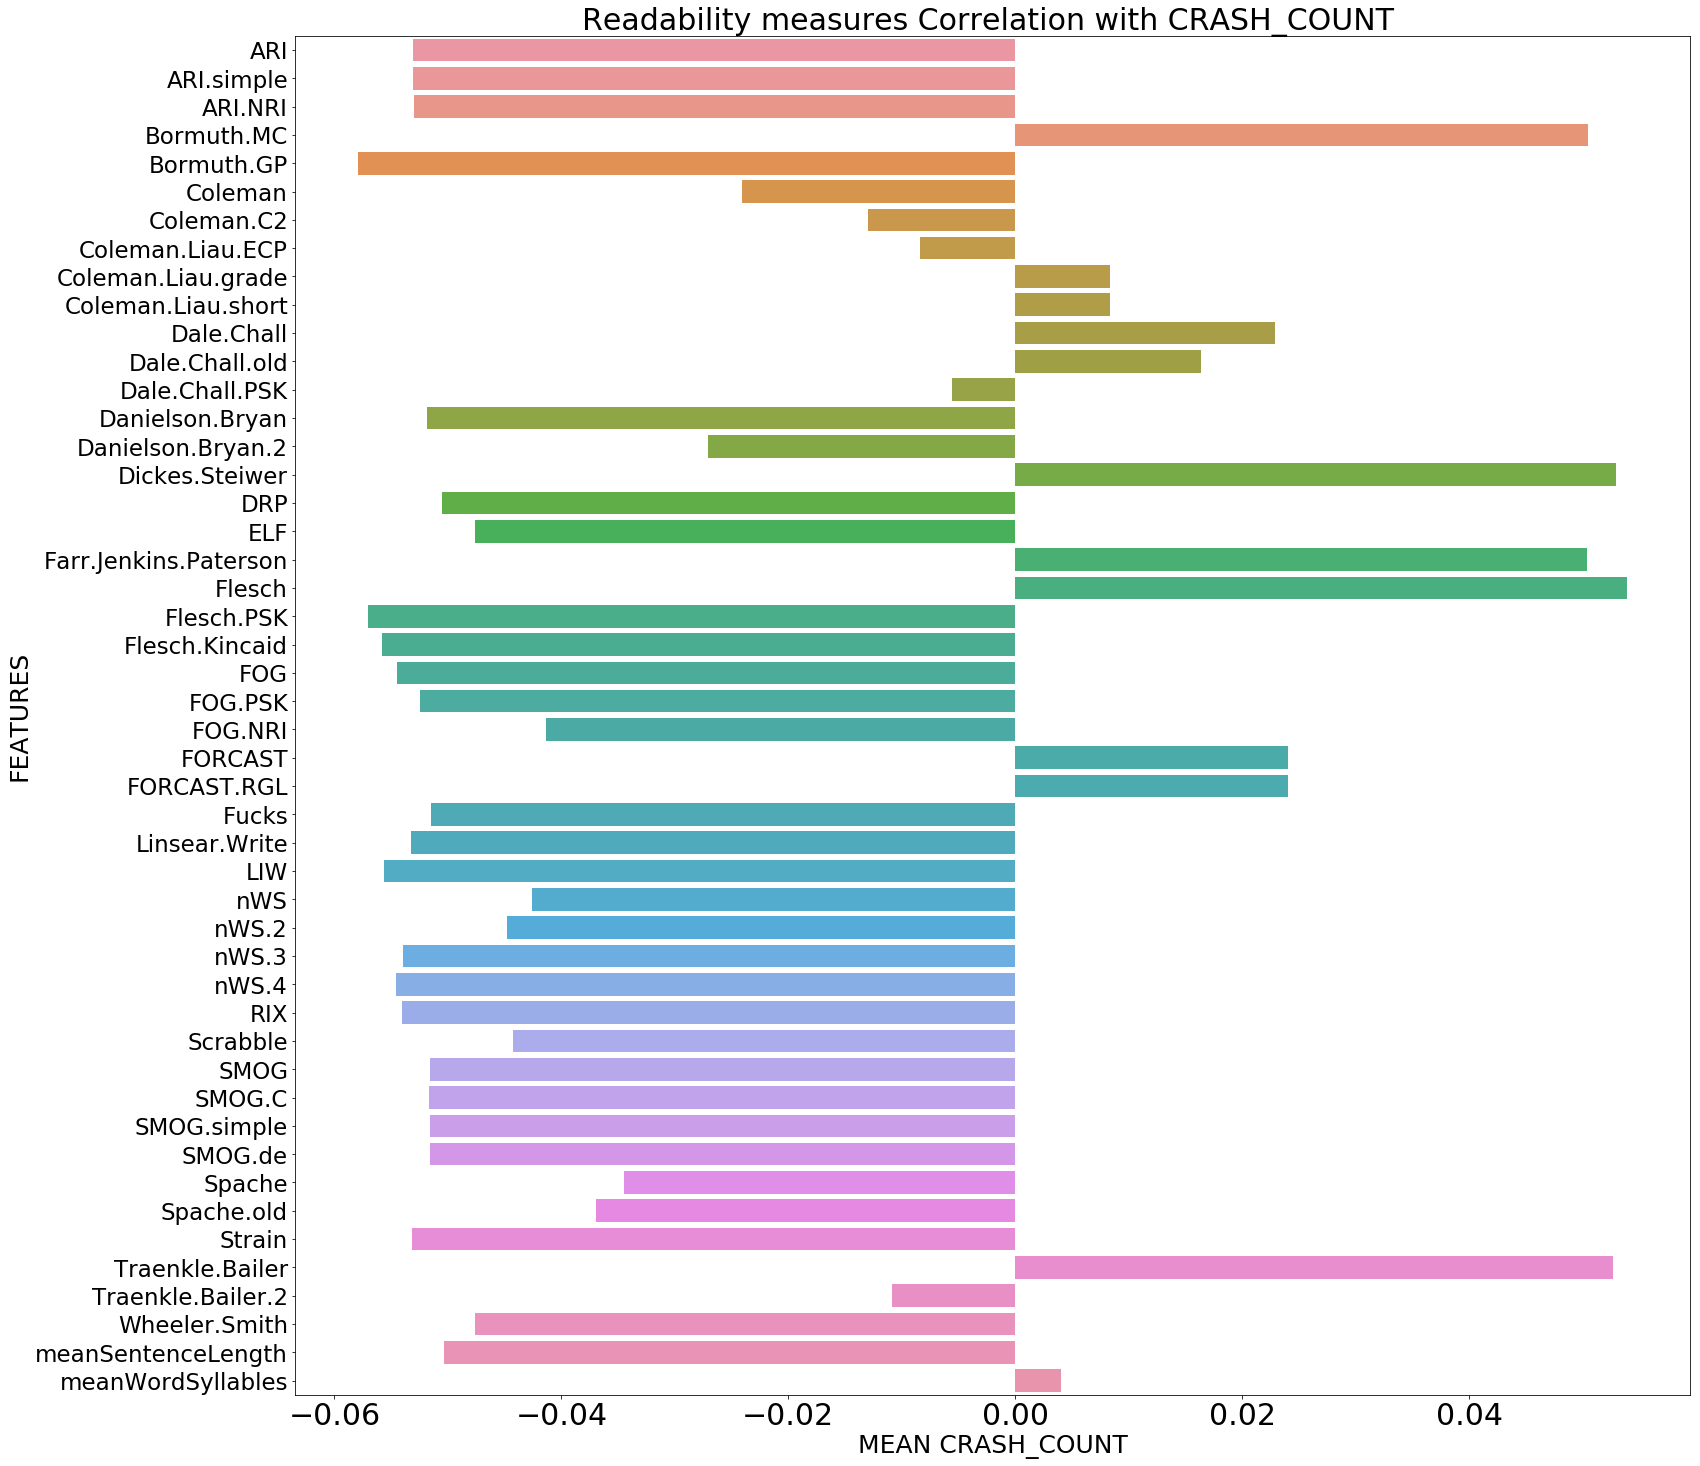

In [9]:
f, ax = plt.subplots(figsize= (25,25))
sns.barplot(x = correlation['CRASH_COUNT'][:48], y = correlation.index[:48])
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 23)
plt.ylabel('FEATURES', fontsize= 25)
plt.xlabel('MEAN CRASH_COUNT', fontsize= 25)
plt.title('Readability measures Correlation with CRASH_COUNT ', fontsize =30)
plt.show()

In [11]:
Y = dataset[['NCSKEW', 'DUVOL', 'CRASH_COUNT']]  #(dataset['NCSKEW'] + dataset['DUVOL'] + dataset['CRASH_COUNT'])/3
X = dataset.drop(['NCSKEW', 'DUVOL', 'CRASH_COUNT'], axis = 1)

## Regression

* (1) Choose the 2 best algorithms and choose the measure to focus
* (2) Hyper-parametering and cross validating -> 2 algs, 1 metric?

**Split - train / test**

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=seed, test_size= 0.20)

In [12]:
Y_train_NCSKEW = Y_train['NCSKEW']  #(dataset['NCSKEW'] + dataset['DUVOL'] + dataset['CRASH_COUNT'])/3
Y_train_DUVOL = Y_train['DUVOL']
Y_train_CRASH_COUNT = Y_train['CRASH_COUNT']

Y_test_NCSKEW = Y_test['NCSKEW']  #(dataset['NCSKEW'] + dataset['DUVOL'] + dataset['CRASH_COUNT'])/3
Y_test_DUVOL = Y_test['DUVOL']
Y_test_CRASH_COUNT = Y_test['CRASH_COUNT']

### Linear Regression

In [76]:
results_mse = [] #save results for 3 measures and all algorithms
results_error = [] #save results for 3 measures and all algorithms
results_r2 = []
#feature_selection
results_mse_fs = [] #save results for 3 measures and all algorithms
results_error_fs = [] #save results for 3 measures and all algorithms
results_r2_fs = []

#### All Crash Risk measures without feature selection

In [77]:
alg = 'Linear regression'
linear_reg_model_NCSKEW = LinearRegression()
linear_reg_model_DUVOL = LinearRegression()
linear_reg_model_CRASH_COUNT = LinearRegression()

linear_reg_model_NCSKEW.fit(X_train,Y_train_NCSKEW)
linear_reg_model_DUVOL.fit(X_train,Y_train_DUVOL)
linear_reg_model_CRASH_COUNT.fit(X_train,Y_train_CRASH_COUNT)

results_error.append([alg,median_absolute_error(Y_test_NCSKEW,linear_reg_model_NCSKEW.predict(X_test)), median_absolute_error(Y_test_DUVOL, linear_reg_model_DUVOL.predict(X_test)), median_absolute_error(Y_test_CRASH_COUNT, linear_reg_model_CRASH_COUNT.predict(X_test))])
results_mse.append([  alg,mse(Y_test_NCSKEW,linear_reg_model_NCSKEW.predict(X_test)),                   mse(Y_test_DUVOL, linear_reg_model_DUVOL.predict(X_test)),                   mse(Y_test_CRASH_COUNT,linear_reg_model_CRASH_COUNT.predict(X_test))])
results_r2.append([   alg,r2_score(Y_test_NCSKEW,linear_reg_model_NCSKEW.predict(X_test)),              r2_score(Y_test_DUVOL, linear_reg_model_DUVOL.predict(X_test)),              r2_score(Y_test_CRASH_COUNT,linear_reg_model_CRASH_COUNT.predict(X_test))])

#### NCSKEW with feature selection

-----------------------------------> Linear regression - Seleted features
Initial feature number:  48
Final feature number:  24
Feature names:  ['ARI.simple' 'ARI.NRI' 'Bormuth.MC' 'Coleman.C2' 'Coleman.Liau.ECP'
 'Coleman.Liau.short' 'Dale.Chall' 'Dale.Chall.PSK' 'Danielson.Bryan'
 'Danielson.Bryan.2' 'DRP' 'ELF' 'Farr.Jenkins.Paterson' 'Flesch'
 'Flesch.PSK' 'Flesch.Kincaid' 'Fucks' 'SMOG.simple' 'SMOG.de' 'Spache'
 'Spache.old' 'Wheeler.Smith' 'meanSentenceLength' 'meanWordSyllables']
-----------------------------------
NCSKEW Median Absolute Error 0.04937924305152369
NCSKEW Median Absolute Error Feature selection 0.04826090555644891
----
NCSKEW Mean Squared Error 0.015782347562620126
NCSKEW Mean Squared Error Feature selection 0.015753845833957753


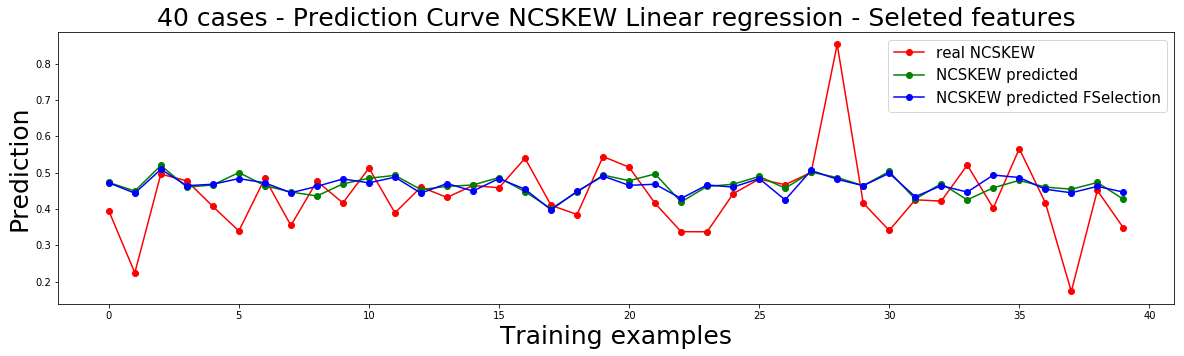

In [78]:
alg = 'Linear regression - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = linear_reg_model_NCSKEW
target_data = Y_train_NCSKEW

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
flinear_reg_model_NCSKEW = LinearRegression()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

flinear_reg_model_NCSKEW.fit(selected_input_train,Y_train_NCSKEW)

#print('NCSKEW R2 Score', r2_score(Y_test_NCSKEW, linear_reg_model_NCSKEW.predict(X_test)))
#print('NCSKEW R2 Score Feature selection', r2_score(Y_test_NCSKEW, flinear_reg_model_NCSKEW.predict(selected_input_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW,linear_reg_model_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error Feature selection', median_absolute_error(Y_test_NCSKEW,flinear_reg_model_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW,linear_reg_model_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error Feature selection', mse(Y_test_NCSKEW,flinear_reg_model_NCSKEW.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_NCSKEW,flinear_reg_model_NCSKEW.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_NCSKEW,flinear_reg_model_NCSKEW.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_NCSKEW,flinear_reg_model_NCSKEW.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, linear_reg_model_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.plot(X_test[0:40].reset_index().index, flinear_reg_model_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

#### DUVOL with feature selection

-----------------------------------> Linear regression - Seleted features
Initial feature number:  48
Final feature number:  1
Feature names:  ['DRP']
-----------------------------------
DUVOL Median Absolute Error 0.08048449597619098
DUVOL Median Absolute Error Feature selection 0.08347953738645761
----
DUVOL Mean Squared Error 0.01885914133814289
DUVOL Mean Squared Error Feature selection 0.01903577368358291


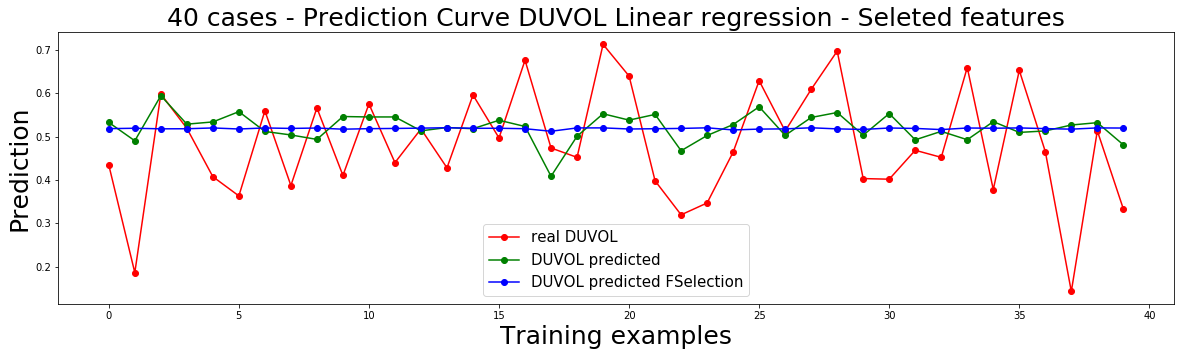

In [79]:
alg = 'Linear regression - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = linear_reg_model_DUVOL
target_data = Y_train_DUVOL

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
flinear_reg_model_DUVOL = LinearRegression()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

flinear_reg_model_DUVOL.fit(selected_input_train,Y_train_DUVOL)

#print('DUVOL R2 Score', r2_score(Y_test_DUVOL, linear_reg_model_DUVOL.predict(X_test)))
#print('DUVOL R2 Score Feature selection', r2_score(Y_test_DUVOL, flinear_reg_model_DUVOL.predict(selected_input_test)))
#print('---- ')
print('DUVOL Median Absolute Error', median_absolute_error(Y_test_DUVOL,linear_reg_model_DUVOL.predict(X_test)))
print('DUVOL Median Absolute Error Feature selection', median_absolute_error(Y_test_DUVOL,flinear_reg_model_DUVOL.predict(selected_input_test)))
print('----')
print('DUVOL Mean Squared Error', mse(Y_test_DUVOL,linear_reg_model_DUVOL.predict(X_test)))
print('DUVOL Mean Squared Error Feature selection', mse(Y_test_DUVOL,flinear_reg_model_DUVOL.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_DUVOL,flinear_reg_model_DUVOL.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_DUVOL,flinear_reg_model_DUVOL.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_DUVOL,flinear_reg_model_DUVOL.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_DUVOL[0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, linear_reg_model_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.plot(X_test[0:40].reset_index().index, flinear_reg_model_DUVOL.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "DUVOL predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

#### Crash Count with feature selection

-----------------------------------> Linear regression - Seleted features
Initial feature number:  48
Final feature number:  3
Feature names:  ['Bormuth.MC' 'DRP' 'SMOG.simple']
-----------------------------------
CRASH_COUNT Median Absolute Error 0.09232954545454547
CRASH_COUNT Median Absolute Error Feature selection 0.10795454545454553
----
CRASH_COUNT Mean Squared Error 0.02431766086459117
CRASH_COUNT Mean Squared Error Feature selection 0.02325244811726611


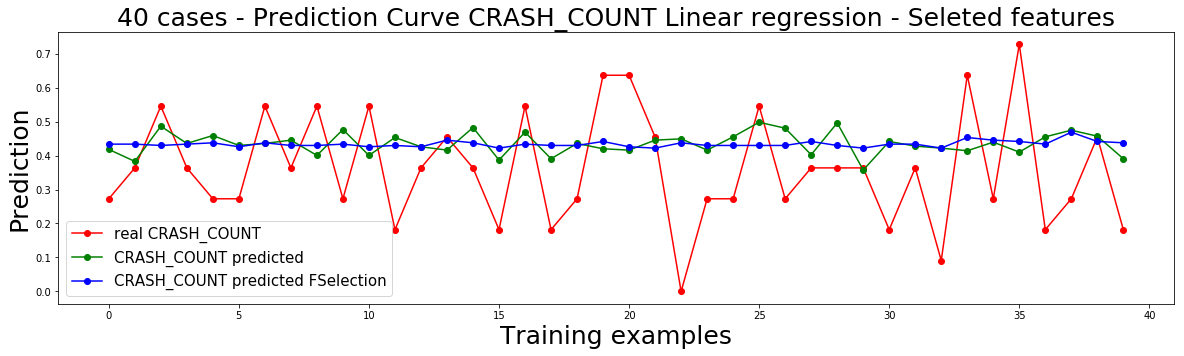

In [80]:
alg = 'Linear regression - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = linear_reg_model_CRASH_COUNT
target_data = Y_train_CRASH_COUNT

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
flinear_reg_model_CRASH_COUNT = LinearRegression()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

flinear_reg_model_CRASH_COUNT.fit(selected_input_train,Y_train_CRASH_COUNT)

#print('CRASH_COUNT R2 Score', r2_score(Y_test_CRASH_COUNT, linear_reg_model_CRASH_COUNT.predict(X_test)))
#print('CRASH_COUNT R2 Score Feature selection', r2_score(Y_test_CRASH_COUNT, flinear_reg_model_CRASH_COUNT.predict(selected_input_test)))
#print('---- ')
print('CRASH_COUNT Median Absolute Error', median_absolute_error(Y_test_CRASH_COUNT,linear_reg_model_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Median Absolute Error Feature selection', median_absolute_error(Y_test_CRASH_COUNT,flinear_reg_model_CRASH_COUNT.predict(selected_input_test)))
print('----')
print('CRASH_COUNT Mean Squared Error', mse(Y_test_CRASH_COUNT,linear_reg_model_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Mean Squared Error Feature selection', mse(Y_test_CRASH_COUNT,flinear_reg_model_CRASH_COUNT.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_CRASH_COUNT,flinear_reg_model_CRASH_COUNT.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_CRASH_COUNT,flinear_reg_model_CRASH_COUNT.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_CRASH_COUNT,flinear_reg_model_CRASH_COUNT.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_CRASH_COUNT[0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, linear_reg_model_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.plot(X_test[0:40].reset_index().index, flinear_reg_model_CRASH_COUNT.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "CRASH_COUNT predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

### Simple Vector Regression

#### All Crash Risk measures without feature selection

/home/programs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/programs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/programs/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-----------------------------------> Simple Vector Regression
NCSKEW Median Absolute Error 0.04470691756515255
DUVOL Median Absolute Error 0.08020606093353966
Crash Count Median Absolute Error 0.09520045200101379
----
NCSKEW Mean Squared Error 0.01623321083876619
DUVOL Mean Squared Error 0.020075124957692224
Crash Count Mean Squared Error 0.023017431086248385


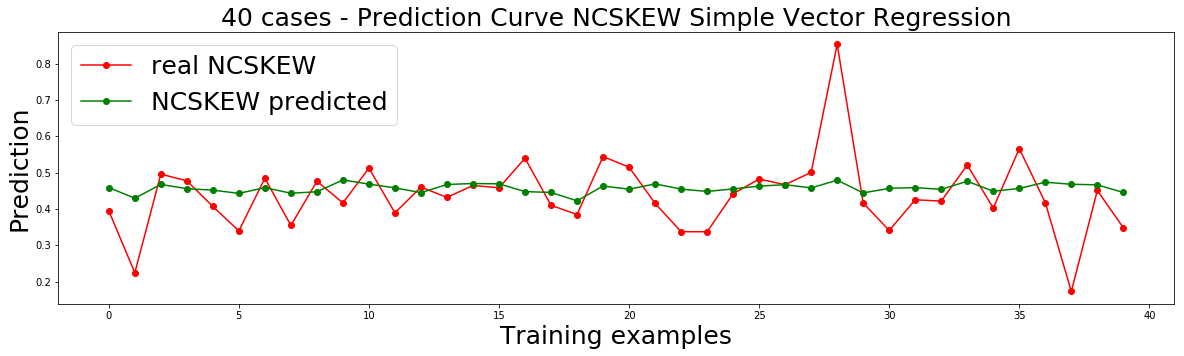

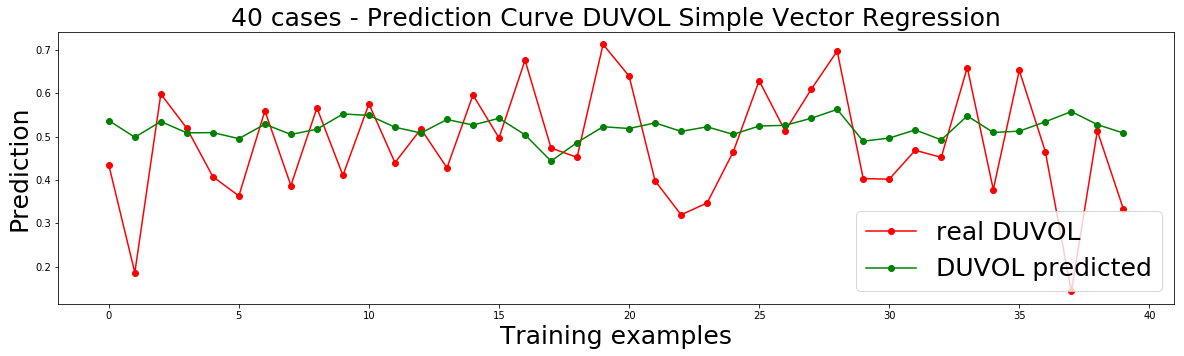

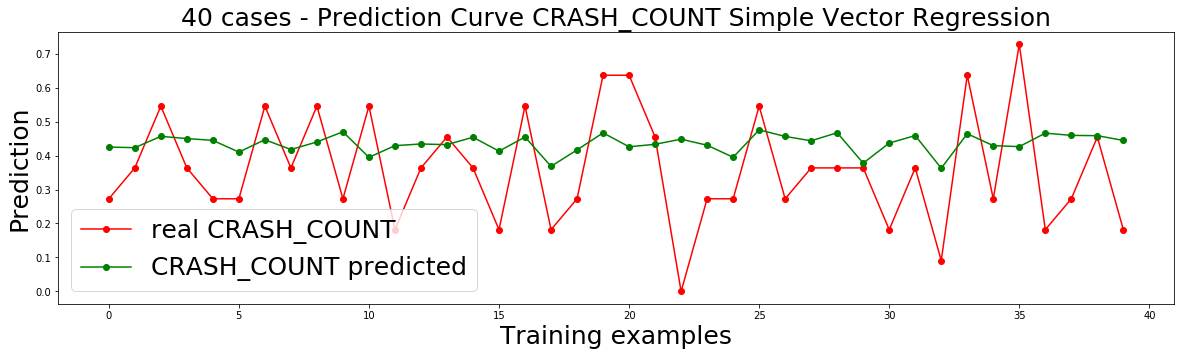

In [15]:
alg = 'Simple Vector Regression'
svreg_NCSKEW = svm.SVR(epsilon = 0.01, C = 80)
svreg_DUVOL = svm.SVR(epsilon = 0.01, C = 80)
svreg_CRASH_COUNT = svm.SVR(epsilon = 0.01, C = 80)

svreg_NCSKEW.fit(X_train,Y_train_NCSKEW)
svreg_DUVOL.fit(X_train,Y_train_DUVOL)
svreg_CRASH_COUNT.fit(X_train,Y_train_CRASH_COUNT)

print("-----------------------------------> "+ alg)
#print('NCSKEW R2 Score', r2_score(Y_test_NCSKEW, svreg_NCSKEW.predict(X_test)))
#print('DUVOL R2 Score', r2_score(Y_test_DUVOL, svreg_DUVOL.predict(X_test)))
#print('Crash R2 Score', r2_score(Y_test_CRASH_COUNT, svreg_CRASH_COUNT.predict(X_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW,svreg_NCSKEW.predict(X_test)))
print('DUVOL Median Absolute Error', median_absolute_error(Y_test_DUVOL,svreg_DUVOL.predict(X_test)))
print('Crash Count Median Absolute Error', median_absolute_error(Y_test_CRASH_COUNT,svreg_CRASH_COUNT.predict(X_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW,svreg_NCSKEW.predict(X_test)))
print('DUVOL Mean Squared Error', mse(Y_test_DUVOL,svreg_DUVOL.predict(X_test)))
print('Crash Count Mean Squared Error', mse(Y_test_CRASH_COUNT,svreg_CRASH_COUNT.predict(X_test)))

results_error.append([alg,median_absolute_error(Y_test_NCSKEW,svreg_NCSKEW.predict(X_test)), median_absolute_error(Y_test_DUVOL, svreg_DUVOL.predict(X_test)), median_absolute_error(Y_test_CRASH_COUNT, svreg_CRASH_COUNT.predict(X_test))])
results_mse.append([  alg,mse(Y_test_NCSKEW,svreg_NCSKEW.predict(X_test)),                   mse(Y_test_DUVOL, svreg_DUVOL.predict(X_test)),                   mse(Y_test_CRASH_COUNT,svreg_CRASH_COUNT.predict(X_test))])
results_r2.append([   alg,r2_score(Y_test_NCSKEW,svreg_NCSKEW.predict(X_test)),              r2_score(Y_test_DUVOL, svreg_DUVOL.predict(X_test)),              r2_score(Y_test_CRASH_COUNT,svreg_CRASH_COUNT.predict(X_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, svreg_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.legend(fontsize = 25)
plt.show()

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_DUVOL[0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, svreg_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.legend(fontsize = 25)
plt.show()

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_CRASH_COUNT[0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, svreg_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.legend(fontsize = 25)
plt.show()

#### WIthout feature selection: The classifier does not expose feature importances

### Gradient Boosting Regressor

#### All Crash Risk measures without feature selection

In [94]:
alg = 'Gradient Boosting Regressor'
gbr_NCSKEW = GradientBoostingRegressor()
gbr_DUVOL = GradientBoostingRegressor()
gbr_CRASH_COUNT = GradientBoostingRegressor()

gbr_NCSKEW.fit(X_train,Y_train_NCSKEW)
gbr_DUVOL.fit(X_train,Y_train_DUVOL)
gbr_CRASH_COUNT.fit(X_train,Y_train_CRASH_COUNT)

results_error.append([alg,median_absolute_error(Y_test_NCSKEW,gbr_NCSKEW.predict(X_test)), median_absolute_error(Y_test_DUVOL, gbr_DUVOL.predict(X_test)), median_absolute_error(Y_test_CRASH_COUNT, gbr_CRASH_COUNT.predict(X_test))])
results_mse.append([  alg,mse(Y_test_NCSKEW,gbr_NCSKEW.predict(X_test)),                   mse(Y_test_DUVOL, gbr_DUVOL.predict(X_test)),                   mse(Y_test_CRASH_COUNT,gbr_CRASH_COUNT.predict(X_test))])
results_r2.append([   alg,r2_score(Y_test_NCSKEW,gbr_NCSKEW.predict(X_test)),              r2_score(Y_test_DUVOL, gbr_DUVOL.predict(X_test)),              r2_score(Y_test_CRASH_COUNT,gbr_CRASH_COUNT.predict(X_test))])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

#### NCSKEW with feature selection

-----------------------------------> Gradient Boosting Regressor - Sel features
Initial feature number:  48
Final feature number:  40
Feature names:  ['ARI' 'ARI.simple' 'ARI.NRI' 'Bormuth.MC' 'Bormuth.GP' 'Coleman'
 'Coleman.C2' 'Coleman.Liau.ECP' 'Coleman.Liau.grade' 'Coleman.Liau.short'
 'Dale.Chall' 'Dale.Chall.old' 'Dale.Chall.PSK' 'Danielson.Bryan'
 'Danielson.Bryan.2' 'Dickes.Steiwer' 'ELF' 'Flesch' 'Flesch.PSK'
 'Flesch.Kincaid' 'FOG' 'FOG.NRI' 'FORCAST' 'FORCAST.RGL' 'Linsear.Write'
 'LIW' 'nWS' 'nWS.2' 'nWS.3' 'nWS.4' 'RIX' 'Scrabble' 'SMOG' 'SMOG.de'
 'Spache' 'Spache.old' 'Strain' 'Traenkle.Bailer.2' 'Wheeler.Smith'
 'meanWordSyllables']
-----------------------------------
NCSKEW Median Absolute Error 0.052722296829323306
NCSKEW Median Absolute Error Feature selection 0.05261852244508189
----
NCSKEW Mean Squared Error 0.017385600436846844
NCSKEW Mean Squared Error Feature selection 0.017023530162187918


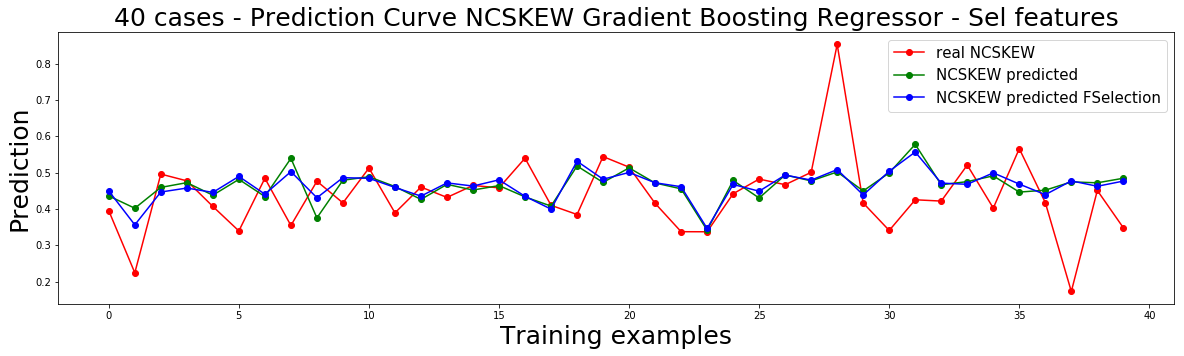

In [104]:
alg = 'Gradient Boosting Regressor - Sel features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = gbr_NCSKEW
target_data = Y_train_NCSKEW

#print("base_results")
base_results = model_selection.cross_validate(model_to_fselection, X_train, target_data, cv  = cv_split2)

#base model
print('Initial feature number: ', X_train.shape[1]) 

#print('Feature names: ', X_train.columns.values)
model_to_fselection.fit(X_train, target_data)
#feature selection

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#print("rfe_results")
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)



fgbr_NCSKEW = GradientBoostingRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fgbr_NCSKEW.fit(selected_input_train,Y_train_NCSKEW)

print("-----------------------------------")
#print('NCSKEW R2 Score', r2_score(Y_test_NCSKEW, gbr_NCSKEW.predict(X_test)))
#print('NCSKEW R2 Score Feature selection', r2_score(Y_test_NCSKEW, fgbr_NCSKEW.predict(selected_input_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW,gbr_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error Feature selection', median_absolute_error(Y_test_NCSKEW,fgbr_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW,gbr_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error Feature selection', mse(Y_test_NCSKEW,fgbr_NCSKEW.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_NCSKEW,fgbr_NCSKEW.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_NCSKEW,fgbr_NCSKEW.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_NCSKEW,fgbr_NCSKEW.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, gbr_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.plot(X_test[0:40].reset_index().index, fgbr_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

#### DUVOL with feature selection

-----------------------------------> Gradient Boosting Regressor - Sel features
Initial feature number:  48
Final feature number:  36
Feature names:  ['ARI.NRI' 'Bormuth.GP' 'Coleman' 'Coleman.C2' 'Coleman.Liau.ECP'
 'Coleman.Liau.grade' 'Coleman.Liau.short' 'Dale.Chall' 'Dale.Chall.old'
 'Dale.Chall.PSK' 'Danielson.Bryan' 'Danielson.Bryan.2' 'Dickes.Steiwer'
 'ELF' 'Flesch' 'Flesch.PSK' 'Flesch.Kincaid' 'FOG' 'FOG.PSK' 'FOG.NRI'
 'FORCAST' 'Fucks' 'LIW' 'nWS' 'nWS.2' 'nWS.3' 'nWS.4' 'RIX' 'Scrabble'
 'SMOG.C' 'Spache' 'Spache.old' 'Strain' 'Traenkle.Bailer.2'
 'Wheeler.Smith' 'meanWordSyllables']
-----------------------------------
DUVOL Median Absolute Error 0.07441766534781633
DUVOL Median Absolute Error Feature selection 0.07579943364127284
----
DUVOL Mean Squared Error 0.019129839483606245
DUVOL Mean Squared Error Feature selection 0.01931124958585276


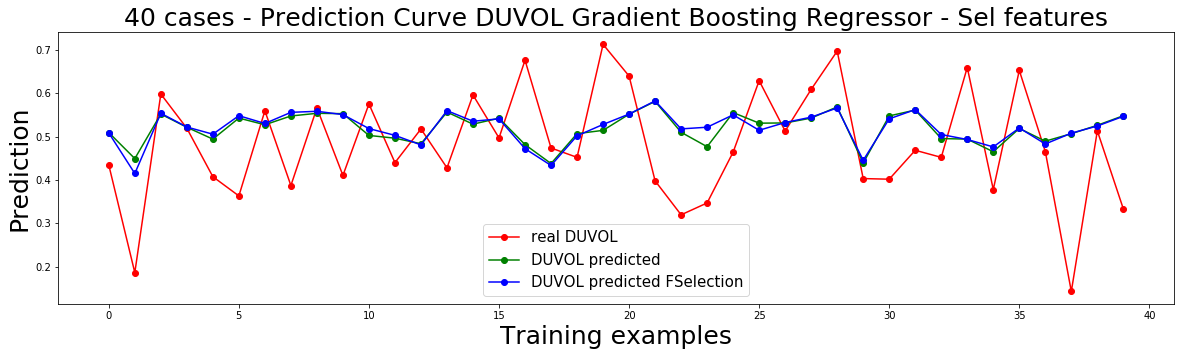

In [110]:
alg = 'Gradient Boosting Regressor - Sel features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = gbr_DUVOL
target_data = Y_train_DUVOL

#print("base_results")
base_results = model_selection.cross_validate(model_to_fselection, X_train, target_data, cv  = cv_split2)

#base model
print('Initial feature number: ', X_train.shape[1]) 

#print('Feature names: ', X_train.columns.values)
model_to_fselection.fit(X_train, target_data)
#feature selection

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#print("rfe_results")
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)



fgbr_DUVOL = GradientBoostingRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fgbr_DUVOL.fit(selected_input_train,Y_train_DUVOL)

print("-----------------------------------")
#print('DUVOL R2 Score', r2_score(Y_test_DUVOL, gbr_DUVOL.predict(X_test)))
#print('DUVOL R2 Score Feature selection', r2_score(Y_test_DUVOL, fgbr_DUVOL.predict(selected_input_test)))
#print('---- ')
print('DUVOL Median Absolute Error', median_absolute_error(Y_test_DUVOL,gbr_DUVOL.predict(X_test)))
print('DUVOL Median Absolute Error Feature selection', median_absolute_error(Y_test_DUVOL,fgbr_DUVOL.predict(selected_input_test)))
print('----')
print('DUVOL Mean Squared Error', mse(Y_test_DUVOL,gbr_DUVOL.predict(X_test)))
print('DUVOL Mean Squared Error Feature selection', mse(Y_test_DUVOL,fgbr_DUVOL.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_DUVOL,fgbr_DUVOL.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_DUVOL,fgbr_DUVOL.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_DUVOL,fgbr_DUVOL.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_DUVOL[0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, gbr_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.plot(X_test[0:40].reset_index().index, fgbr_DUVOL.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "DUVOL predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

#### CRASH COUNT with feature selection

-----------------------------------> Gradient Boosting Regressor - Sel features
Initial feature number:  48
Final feature number:  40
Feature names:  ['ARI' 'ARI.simple' 'ARI.NRI' 'Bormuth.GP' 'Coleman' 'Coleman.C2'
 'Coleman.Liau.ECP' 'Coleman.Liau.grade' 'Coleman.Liau.short' 'Dale.Chall'
 'Dale.Chall.old' 'Dale.Chall.PSK' 'Danielson.Bryan' 'Danielson.Bryan.2'
 'Dickes.Steiwer' 'DRP' 'Farr.Jenkins.Paterson' 'Flesch' 'Flesch.PSK'
 'Flesch.Kincaid' 'FOG' 'FOG.PSK' 'FOG.NRI' 'FORCAST.RGL' 'Fucks'
 'Linsear.Write' 'LIW' 'nWS' 'nWS.2' 'nWS.3' 'nWS.4' 'RIX' 'Scrabble'
 'SMOG.C' 'Spache' 'Spache.old' 'Strain' 'Traenkle.Bailer.2'
 'Wheeler.Smith' 'meanWordSyllables']
-----------------------------------
CRASH_COUNT Median Absolute Error 0.10938793075509262
CRASH_COUNT Median Absolute Error Feature selection 0.10687462061598868
----
CRASH_COUNT Mean Squared Error 0.02514202899575697
CRASH_COUNT Mean Squared Error Feature selection 0.025087908265172352


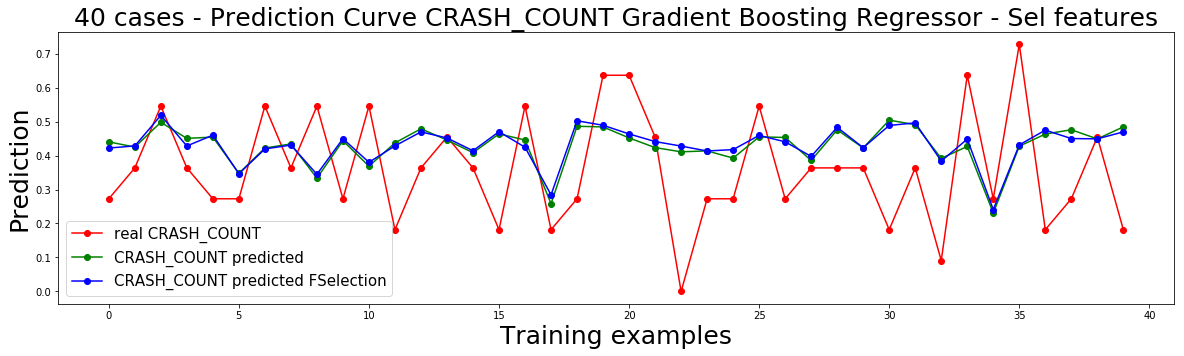

In [111]:
alg = 'Gradient Boosting Regressor - Sel features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = gbr_CRASH_COUNT
target_data = Y_train_CRASH_COUNT

#print("base_results")
base_results = model_selection.cross_validate(model_to_fselection, X_train, target_data, cv  = cv_split2)

#base model
print('Initial feature number: ', X_train.shape[1]) 

#print('Feature names: ', X_train.columns.values)
model_to_fselection.fit(X_train, target_data)
#feature selection

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#print("rfe_results")
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)



fgbr_CRASH_COUNT = GradientBoostingRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fgbr_CRASH_COUNT.fit(selected_input_train,Y_train_CRASH_COUNT)

print("-----------------------------------")
#print('CRASH_COUNT R2 Score', r2_score(Y_test_CRASH_COUNT, gbr_CRASH_COUNT.predict(X_test)))
#print('CRASH_COUNT R2 Score Feature selection', r2_score(Y_test_CRASH_COUNT, fgbr_CRASH_COUNT.predict(selected_input_test)))
#print('---- ')
print('CRASH_COUNT Median Absolute Error', median_absolute_error(Y_test_CRASH_COUNT,gbr_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Median Absolute Error Feature selection', median_absolute_error(Y_test_CRASH_COUNT,fgbr_CRASH_COUNT.predict(selected_input_test)))
print('----')
print('CRASH_COUNT Mean Squared Error', mse(Y_test_CRASH_COUNT,gbr_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Mean Squared Error Feature selection', mse(Y_test_CRASH_COUNT,fgbr_CRASH_COUNT.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_CRASH_COUNT,fgbr_CRASH_COUNT.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_CRASH_COUNT,fgbr_CRASH_COUNT.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_CRASH_COUNT,fgbr_CRASH_COUNT.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_CRASH_COUNT[0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, gbr_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.plot(X_test[0:40].reset_index().index, fgbr_CRASH_COUNT.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "CRASH_COUNT predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

### Decision Tree

#### All Crash Risk measures without feature selection

In [112]:
alg = 'Decision Tree'
tree_regressor_NCSKEW = DecisionTreeRegressor()#random_state = 20
tree_regressor_DUVOL = DecisionTreeRegressor()#random_state = 20
tree_regressor_CRASH_COUNT = DecisionTreeRegressor()#random_state = 20

tree_regressor_NCSKEW.fit(X_train,Y_train_NCSKEW)
tree_regressor_DUVOL.fit(X_train,Y_train_DUVOL)
tree_regressor_CRASH_COUNT.fit(X_train,Y_train_CRASH_COUNT)

results_error.append([alg,median_absolute_error(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)), median_absolute_error(Y_test_DUVOL, tree_regressor_DUVOL.predict(X_test)), median_absolute_error(Y_test_CRASH_COUNT, tree_regressor_CRASH_COUNT.predict(X_test))])
results_mse.append([  alg,mse(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)),                   mse(Y_test_DUVOL, tree_regressor_DUVOL.predict(X_test)),                   mse(Y_test_CRASH_COUNT,tree_regressor_CRASH_COUNT.predict(X_test))])
results_r2.append([   alg,r2_score(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)),              r2_score(Y_test_DUVOL, tree_regressor_DUVOL.predict(X_test)),              r2_score(Y_test_CRASH_COUNT,tree_regressor_CRASH_COUNT.predict(X_test))])

#### NCSKEW with feature selection

-----------------------------------> Decision Tree - Seleted features
Initial feature number:  48
Final feature number:  1
Feature names:  ['nWS']
-----------------------------------
NCSKEW Median Absolute Error 0.08864086410152938
NCSKEW Median Absolute Error Feature selection 0.09551194984553157
----
NCSKEW Mean Squared Error 0.03065197226437705
NCSKEW Mean Squared Error Feature selection 0.032761984819346855


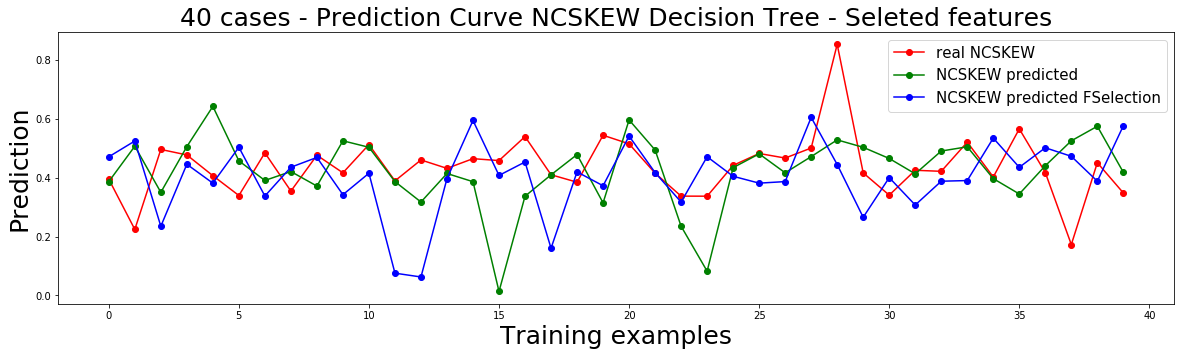

In [113]:
alg = 'Decision Tree - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = tree_regressor_NCSKEW
target_data = Y_train_NCSKEW

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
ftree_regressor_NCSKEW = DecisionTreeRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

ftree_regressor_NCSKEW.fit(selected_input_train,Y_train_NCSKEW)

#print('NCSKEW R2 Score', r2_score(Y_test_NCSKEW, tree_regressor_NCSKEW.predict(X_test)))
#print('NCSKEW R2 Score Feature selection', r2_score(Y_test_NCSKEW, ftree_regressor_NCSKEW.predict(selected_input_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error Feature selection', median_absolute_error(Y_test_NCSKEW,ftree_regressor_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error Feature selection', mse(Y_test_NCSKEW,ftree_regressor_NCSKEW.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_NCSKEW,ftree_regressor_NCSKEW.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_NCSKEW,ftree_regressor_NCSKEW.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_NCSKEW,ftree_regressor_NCSKEW.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, tree_regressor_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.plot(X_test[0:40].reset_index().index, ftree_regressor_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

#### DUVOL with feature selection

-----------------------------------> Decision Tree - Seleted features
Initial feature number:  48
Final feature number:  6
Feature names:  ['Coleman.C2' 'Dale.Chall.PSK' 'FOG.NRI' 'LIW' 'nWS.3' 'Spache']
-----------------------------------
DUVOL Median Absolute Error 0.10033736370367313
DUVOL Median Absolute Error Feature selection 0.11841168425826754
----
DUVOL Mean Squared Error 0.030364972890129772
DUVOL Mean Squared Error Feature selection 0.03743744894618488


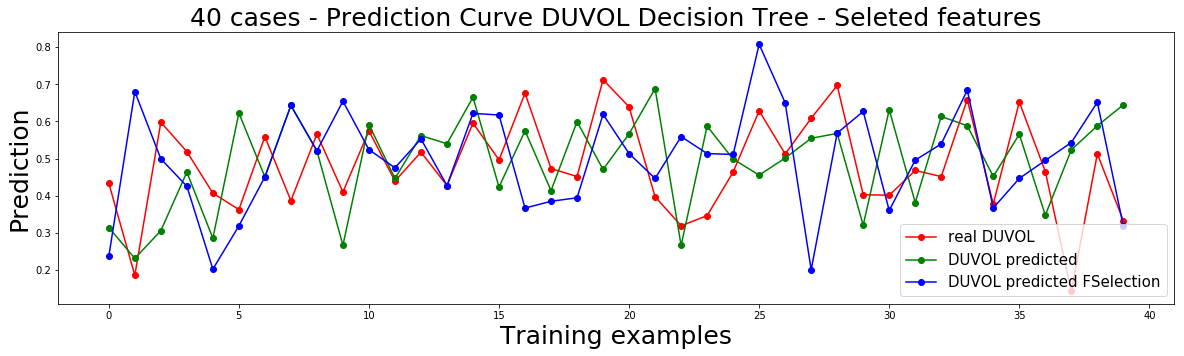

In [114]:
alg = 'Decision Tree - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = tree_regressor_DUVOL
target_data = Y_train_DUVOL

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
ftree_regressor_DUVOL = DecisionTreeRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

ftree_regressor_DUVOL.fit(selected_input_train,Y_train_DUVOL)

#print('DUVOL R2 Score', r2_score(Y_test_DUVOL, tree_regressor_DUVOL.predict(X_test)))
#print('DUVOL R2 Score Feature selection', r2_score(Y_test_DUVOL, ftree_regressor_DUVOL.predict(selected_input_test)))
#print('---- ')
print('DUVOL Median Absolute Error', median_absolute_error(Y_test_DUVOL,tree_regressor_DUVOL.predict(X_test)))
print('DUVOL Median Absolute Error Feature selection', median_absolute_error(Y_test_DUVOL,ftree_regressor_DUVOL.predict(selected_input_test)))
print('----')
print('DUVOL Mean Squared Error', mse(Y_test_DUVOL,tree_regressor_DUVOL.predict(X_test)))
print('DUVOL Mean Squared Error Feature selection', mse(Y_test_DUVOL,ftree_regressor_DUVOL.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_DUVOL,ftree_regressor_DUVOL.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_DUVOL,ftree_regressor_DUVOL.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_DUVOL,ftree_regressor_DUVOL.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_DUVOL[0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, tree_regressor_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.plot(X_test[0:40].reset_index().index, ftree_regressor_DUVOL.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "DUVOL predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

#### CRASH COUNT with feature selection

-----------------------------------> Decision Tree - Seleted features
Initial feature number:  48
Final feature number:  1
Feature names:  ['Dale.Chall.old']
-----------------------------------
CRASH_COUNT Median Absolute Error 0.18181818181818182
CRASH_COUNT Median Absolute Error Feature selection 0.18181818181818182
----
CRASH_COUNT Mean Squared Error 0.05448257276320518
CRASH_COUNT Mean Squared Error Feature selection 0.05048508803449516


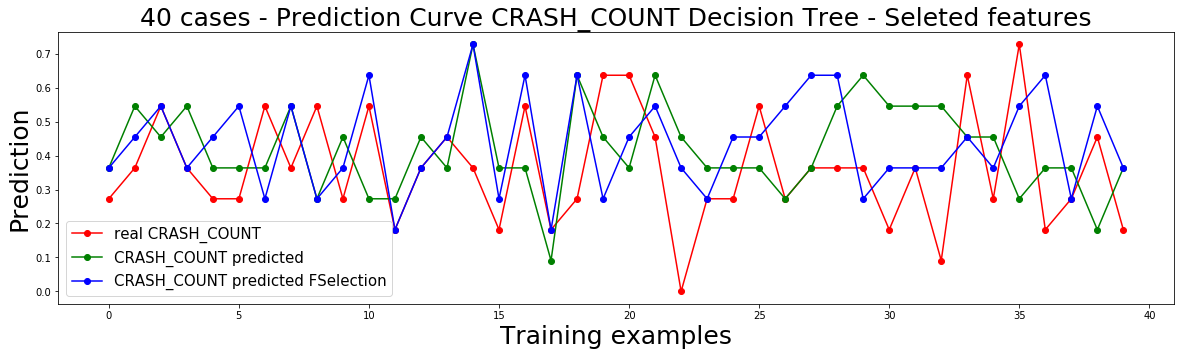

In [115]:
alg = 'Decision Tree - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = tree_regressor_CRASH_COUNT
target_data = Y_train_CRASH_COUNT

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
ftree_regressor_CRASH_COUNT = DecisionTreeRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

ftree_regressor_CRASH_COUNT.fit(selected_input_train,Y_train_CRASH_COUNT)

#print('CRASH_COUNT R2 Score', r2_score(Y_test_CRASH_COUNT, tree_regressor_CRASH_COUNT.predict(X_test)))
#print('CRASH_COUNT R2 Score Feature selection', r2_score(Y_test_CRASH_COUNT, ftree_regressor_CRASH_COUNT.predict(selected_input_test)))
#print('---- ')
print('CRASH_COUNT Median Absolute Error', median_absolute_error(Y_test_CRASH_COUNT,tree_regressor_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Median Absolute Error Feature selection', median_absolute_error(Y_test_CRASH_COUNT,ftree_regressor_CRASH_COUNT.predict(selected_input_test)))
print('----')
print('CRASH_COUNT Mean Squared Error', mse(Y_test_CRASH_COUNT,tree_regressor_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Mean Squared Error Feature selection', mse(Y_test_CRASH_COUNT,ftree_regressor_CRASH_COUNT.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_CRASH_COUNT,ftree_regressor_CRASH_COUNT.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_CRASH_COUNT,ftree_regressor_CRASH_COUNT.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_CRASH_COUNT,ftree_regressor_CRASH_COUNT.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_CRASH_COUNT[0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, tree_regressor_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.plot(X_test[0:40].reset_index().index, ftree_regressor_CRASH_COUNT.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "CRASH_COUNT predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

### Random Florest

#### All Crash Risk measures without feature selection

In [124]:
alg = 'Random forest'
forest_regressor_NCSKEW = RandomForestRegressor()#n_estimators = 300, random_state = 0
forest_regressor_DUVOL = RandomForestRegressor()#n_estimators = 300, random_state = 0
forest_regressor_CRASH_COUNT = RandomForestRegressor()#n_estimators = 300, random_state = 0

forest_regressor_NCSKEW.fit(X_train,Y_train_NCSKEW)
forest_regressor_DUVOL.fit(X_train,Y_train_DUVOL)
forest_regressor_CRASH_COUNT.fit(X_train,Y_train_CRASH_COUNT)

# print("-----------------------------------> "+ alg)
# print('NCSKEW R2 Score', r2_score(Y_test_NCSKEW, tree_regressor_NCSKEW.predict(X_test)))
# print('DUVOL R2 Score', r2_score(Y_test_DUVOL, tree_regressor_DUVOL.predict(X_test)))
# print('Crash R2 Score', r2_score(Y_test_CRASH_COUNT, tree_regressor_CRASH_COUNT.predict(X_test)))
# print('---- ')
# print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)))
# print('DUVOL Median Absolute Error', median_absolute_error(Y_test_DUVOL,tree_regressor_DUVOL.predict(X_test)))
# print('Crash Count Median Absolute Error', median_absolute_error(Y_test_CRASH_COUNT,tree_regressor_CRASH_COUNT.predict(X_test)))
# print('----')
# print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)))
# print('DUVOL Mean Squared Error', mse(Y_test_DUVOL,tree_regressor_DUVOL.predict(X_test)))
# print('Crash Count Mean Squared Error', mse(Y_test_CRASH_COUNT,tree_regressor_CRASH_COUNT.predict(X_test)))

results_error.append([alg,median_absolute_error(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)), median_absolute_error(Y_test_DUVOL, tree_regressor_DUVOL.predict(X_test)), median_absolute_error(Y_test_CRASH_COUNT, tree_regressor_CRASH_COUNT.predict(X_test))])
results_mse.append([  alg,mse(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)),                   mse(Y_test_DUVOL, tree_regressor_DUVOL.predict(X_test)),                   mse(Y_test_CRASH_COUNT,tree_regressor_CRASH_COUNT.predict(X_test))])
results_r2.append([   alg,r2_score(Y_test_NCSKEW,tree_regressor_NCSKEW.predict(X_test)),              r2_score(Y_test_DUVOL, tree_regressor_DUVOL.predict(X_test)),              r2_score(Y_test_CRASH_COUNT,tree_regressor_CRASH_COUNT.predict(X_test))])

# plt.figure(figsize=(20,10))
# plt.title("Prediction Curve " + alg, fontsize = 25)
# plt.xlabel("Training examples",fontsize = 25)
# plt.ylabel("Prediction", fontsize = 25)
# plt.plot(X_test[10:40].reset_index().index, Y_test_NCSKEW[10:40], 'o-', color = 'r', label = 'real')
# plt.plot(X_test[10:40].reset_index().index, tree_regressor_NCSKEW.predict(X_test)[10:40] , 'o-', color = 'g', label = "NCSKEW predicted")
# plt.plot(X_test[10:40].reset_index().index, tree_regressor_DUVOL.predict(X_test)[10:40] , 'o-', color = 'b', label = "DUVOL predicted")
# plt.plot(X_test[10:40].reset_index().index, tree_regressor_CRASH_COUNT.predict(X_test)[10:40] , 'o-', color = 'black', label = "CRASH_COUNT predicted")
# plt.legend(fontsize = 25)
# plt.show()

/home/programs/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/programs/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/programs/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### NCSKEW with feature selection

-----------------------------------> Random forest - Seleted features
Initial feature number:  48
Final feature number:  16
Feature names:  ['Coleman' 'Coleman.C2' 'Dale.Chall' 'Dale.Chall.old' 'Danielson.Bryan.2'
 'ELF' 'Flesch' 'FOG.NRI' 'FORCAST.RGL' 'LIW' 'nWS' 'nWS.3' 'Scrabble'
 'Spache' 'Traenkle.Bailer.2' 'meanWordSyllables']
-----------------------------------
NCSKEW Median Absolute Error 0.05530828317602077
NCSKEW Median Absolute Error Feature selection 0.05356984677800536
----
NCSKEW Mean Squared Error 0.01814043932612836
NCSKEW Mean Squared Error Feature selection 0.017806076312648498


/home/programs/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


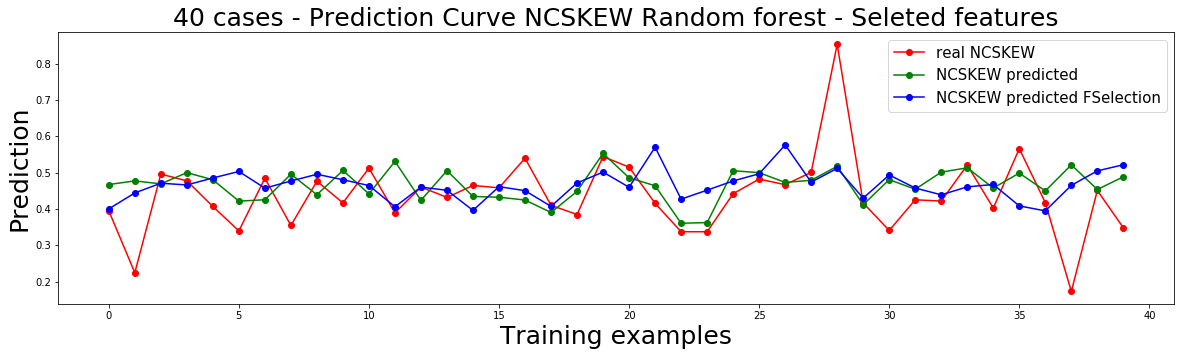

In [126]:
alg = 'Random forest - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = forest_regressor_NCSKEW
target_data = Y_train_NCSKEW

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
fforest_regressor_NCSKEW = RandomForestRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fforest_regressor_NCSKEW.fit(selected_input_train,Y_train_NCSKEW)

#print('NCSKEW R2 Score', r2_score(Y_test_NCSKEW, forest_regressor_NCSKEW.predict(X_test)))
#print('NCSKEW R2 Score Feature selection', r2_score(Y_test_NCSKEW, fforest_regressor_NCSKEW.predict(selected_input_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW,forest_regressor_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error Feature selection', median_absolute_error(Y_test_NCSKEW,fforest_regressor_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW,forest_regressor_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error Feature selection', mse(Y_test_NCSKEW,fforest_regressor_NCSKEW.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_NCSKEW,fforest_regressor_NCSKEW.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_NCSKEW,fforest_regressor_NCSKEW.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_NCSKEW,fforest_regressor_NCSKEW.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, forest_regressor_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.plot(X_test[0:40].reset_index().index, fforest_regressor_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

#### DUVOL with feature selection

-----------------------------------> Random forest - Seleted features
Initial feature number:  48
Final feature number:  32
Feature names:  ['Bormuth.GP' 'Coleman' 'Coleman.C2' 'Coleman.Liau.ECP'
 'Coleman.Liau.grade' 'Dale.Chall' 'Dale.Chall.old' 'Dale.Chall.PSK'
 'Danielson.Bryan' 'Danielson.Bryan.2' 'Dickes.Steiwer' 'ELF'
 'Farr.Jenkins.Paterson' 'Flesch' 'Flesch.PSK' 'Flesch.Kincaid' 'FOG'
 'FOG.PSK' 'FOG.NRI' 'FORCAST.RGL' 'LIW' 'nWS' 'nWS.2' 'nWS.3' 'RIX'
 'Scrabble' 'SMOG' 'Spache' 'Spache.old' 'Traenkle.Bailer.2'
 'Wheeler.Smith' 'meanWordSyllables']
-----------------------------------
DUVOL Median Absolute Error 0.08312874172739859
DUVOL Median Absolute Error Feature selection 0.08780003676635753
----
DUVOL Mean Squared Error 0.022956886892417743
DUVOL Mean Squared Error Feature selection 0.0207818084113881


/home/programs/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


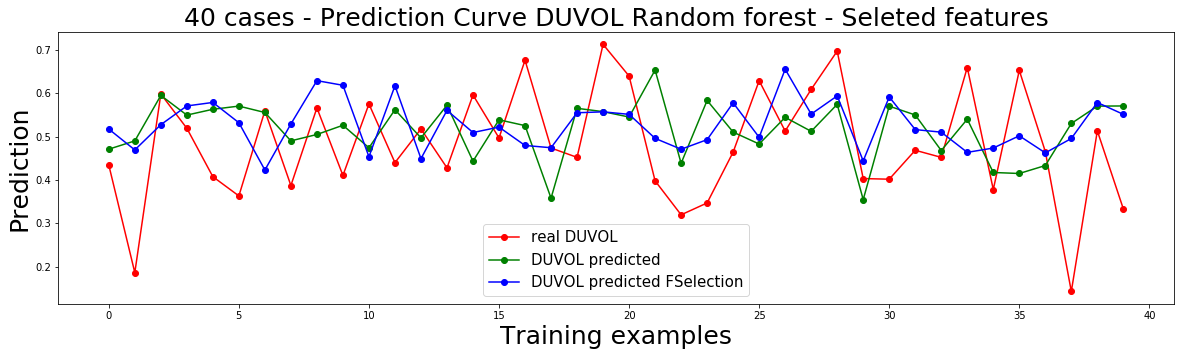

In [128]:
alg = 'Random forest - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = forest_regressor_DUVOL
target_data = Y_train_DUVOL

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
fforest_regressor_DUVOL = RandomForestRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fforest_regressor_DUVOL.fit(selected_input_train,Y_train_DUVOL)

#print('DUVOL R2 Score', r2_score(Y_test_DUVOL, forest_regressor_DUVOL.predict(X_test)))
#print('DUVOL R2 Score Feature selection', r2_score(Y_test_DUVOL, fforest_regressor_DUVOL.predict(selected_input_test)))
#print('---- ')
print('DUVOL Median Absolute Error', median_absolute_error(Y_test_DUVOL,forest_regressor_DUVOL.predict(X_test)))
print('DUVOL Median Absolute Error Feature selection', median_absolute_error(Y_test_DUVOL,fforest_regressor_DUVOL.predict(selected_input_test)))
print('----')
print('DUVOL Mean Squared Error', mse(Y_test_DUVOL,forest_regressor_DUVOL.predict(X_test)))
print('DUVOL Mean Squared Error Feature selection', mse(Y_test_DUVOL,fforest_regressor_DUVOL.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_DUVOL,fforest_regressor_DUVOL.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_DUVOL,fforest_regressor_DUVOL.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_DUVOL,fforest_regressor_DUVOL.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_DUVOL[0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, forest_regressor_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.plot(X_test[0:40].reset_index().index, fforest_regressor_DUVOL.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "DUVOL predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

#### CRASH COUNT with feature selection

-----------------------------------> Random forest - Seleted features
Initial feature number:  48
Final feature number:  24
Feature names:  ['Coleman' 'Coleman.C2' 'Coleman.Liau.ECP' 'Dale.Chall' 'Dale.Chall.old'
 'Dale.Chall.PSK' 'Danielson.Bryan' 'Danielson.Bryan.2'
 'Farr.Jenkins.Paterson' 'Flesch' 'FOG.PSK' 'FOG.NRI' 'LIW' 'nWS' 'nWS.2'
 'nWS.3' 'RIX' 'Scrabble' 'SMOG.de' 'Spache' 'Traenkle.Bailer'
 'Traenkle.Bailer.2' 'Wheeler.Smith' 'meanWordSyllables']
-----------------------------------
CRASH_COUNT Median Absolute Error 0.10909090909090918
CRASH_COUNT Median Absolute Error Feature selection 0.10909090909090927
----
CRASH_COUNT Mean Squared Error 0.02753862738052462
CRASH_COUNT Mean Squared Error Feature selection 0.026376212720086244


/home/programs/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


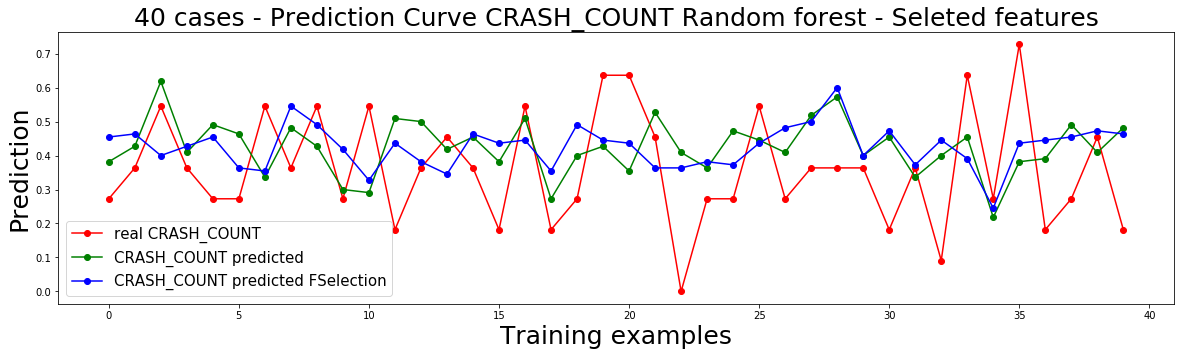

In [129]:
alg = 'Random forest - Seleted features'
print("-----------------------------------> "+ alg)
#RFE - Recursive Feature Elimination
cv_split2 = model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

model_to_fselection = forest_regressor_CRASH_COUNT
target_data = Y_train_CRASH_COUNT

#base model
print('Initial feature number: ', X_train.shape[1]) 

model_rfe = feature_selection.RFECV(model_to_fselection, step = 1, cv = cv_split2)#scoring = 'r2_score'
model_rfe.fit(X_train, target_data)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
seleted_columns = X_train.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model_to_fselection, X_train[seleted_columns], target_data, cv  = cv_split2)
#rfe_results
#print(model_rfe.grid_scores_)
print('Final feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)


print("-----------------------------------") 
fforest_regressor_CRASH_COUNT = RandomForestRegressor()

selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

fforest_regressor_CRASH_COUNT.fit(selected_input_train,Y_train_CRASH_COUNT)

#print('CRASH_COUNT R2 Score', r2_score(Y_test_CRASH_COUNT, forest_regressor_CRASH_COUNT.predict(X_test)))
#print('CRASH_COUNT R2 Score Feature selection', r2_score(Y_test_CRASH_COUNT, fforest_regressor_CRASH_COUNT.predict(selected_input_test)))
#print('---- ')
print('CRASH_COUNT Median Absolute Error', median_absolute_error(Y_test_CRASH_COUNT,forest_regressor_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Median Absolute Error Feature selection', median_absolute_error(Y_test_CRASH_COUNT,fforest_regressor_CRASH_COUNT.predict(selected_input_test)))
print('----')
print('CRASH_COUNT Mean Squared Error', mse(Y_test_CRASH_COUNT,forest_regressor_CRASH_COUNT.predict(X_test)))
print('CRASH_COUNT Mean Squared Error Feature selection', mse(Y_test_CRASH_COUNT,fforest_regressor_CRASH_COUNT.predict(selected_input_test)))

results_error_fs.append([alg,median_absolute_error(Y_test_CRASH_COUNT,fforest_regressor_CRASH_COUNT.predict(selected_input_test))])
results_mse_fs.append([  alg,mse(Y_test_CRASH_COUNT,fforest_regressor_CRASH_COUNT.predict(selected_input_test))])
results_r2_fs.append([   alg,r2_score(Y_test_CRASH_COUNT,fforest_regressor_CRASH_COUNT.predict(selected_input_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_CRASH_COUNT[0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, forest_regressor_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.plot(X_test[0:40].reset_index().index, fforest_regressor_CRASH_COUNT.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "CRASH_COUNT predicted FSelection")
plt.legend(fontsize = 15)
plt.show()

### Multi-layer perceptron regressor

#### All Crash Risk measures without feature selection

-----------------------------------> Multi-layer perceptron regressor
NCSKEW Median Absolute Error 0.046340148165256057
DUVOL Median Absolute Error 0.0795407257891051
Crash Count Median Absolute Error 0.09793931563028857
----
NCSKEW Mean Squared Error 0.016364006197213333
DUVOL Mean Squared Error 0.019147851804734908
Crash Count Mean Squared Error 0.023652019809359714


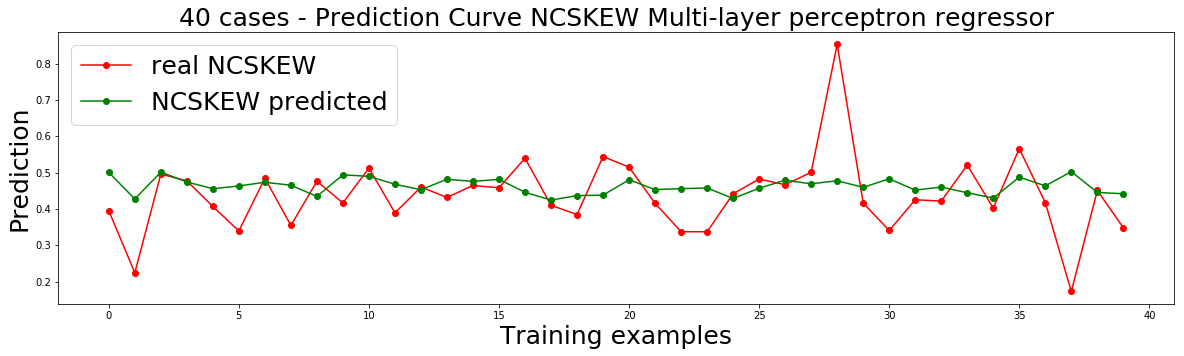

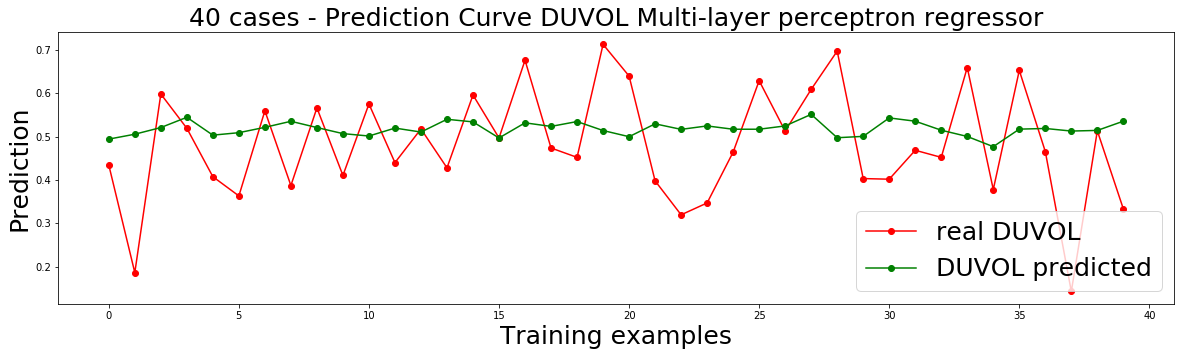

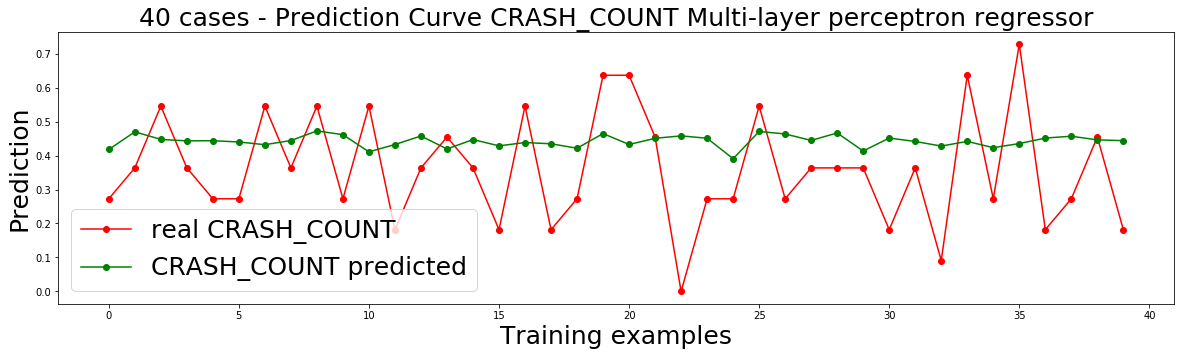

In [134]:
alg = 'Multi-layer perceptron regressor'
clf_NCSKEW = MLPRegressor()
clf_DUVOL = MLPRegressor()
clf_CRASH_COUNT = MLPRegressor()

clf_NCSKEW.fit(X_train,Y_train_NCSKEW)
clf_DUVOL.fit(X_train,Y_train_DUVOL)
clf_CRASH_COUNT.fit(X_train,Y_train_CRASH_COUNT)

print("-----------------------------------> "+ alg)
#print('NCSKEW R2 Score', r2_score(Y_test_NCSKEW, clf_NCSKEW.predict(X_test)))
#print('DUVOL R2 Score', r2_score(Y_test_DUVOL, clf_DUVOL.predict(X_test)))
#print('Crash R2 Score', r2_score(Y_test_CRASH_COUNT, clf_CRASH_COUNT.predict(X_test)))
#print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW,clf_NCSKEW.predict(X_test)))
print('DUVOL Median Absolute Error', median_absolute_error(Y_test_DUVOL,clf_DUVOL.predict(X_test)))
print('Crash Count Median Absolute Error', median_absolute_error(Y_test_CRASH_COUNT,clf_CRASH_COUNT.predict(X_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW,clf_NCSKEW.predict(X_test)))
print('DUVOL Mean Squared Error', mse(Y_test_DUVOL,clf_DUVOL.predict(X_test)))
print('Crash Count Mean Squared Error', mse(Y_test_CRASH_COUNT,clf_CRASH_COUNT.predict(X_test)))

results_error.append([alg,median_absolute_error(Y_test_NCSKEW,clf_NCSKEW.predict(X_test)), median_absolute_error(Y_test_DUVOL, clf_DUVOL.predict(X_test)), median_absolute_error(Y_test_CRASH_COUNT, clf_CRASH_COUNT.predict(X_test))])
results_mse.append([  alg,mse(Y_test_NCSKEW,clf_NCSKEW.predict(X_test)),                   mse(Y_test_DUVOL, clf_DUVOL.predict(X_test)),                   mse(Y_test_CRASH_COUNT,clf_CRASH_COUNT.predict(X_test))])
results_r2.append([   alg,r2_score(Y_test_NCSKEW,clf_NCSKEW.predict(X_test)),              r2_score(Y_test_DUVOL, clf_DUVOL.predict(X_test)),              r2_score(Y_test_CRASH_COUNT,clf_CRASH_COUNT.predict(X_test))])

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, clf_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "NCSKEW predicted")
plt.legend(fontsize = 25)
plt.show()

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve DUVOL " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_DUVOL[0:40], 'o-', color = 'r', label = 'real DUVOL')
plt.plot(X_test[0:40].reset_index().index, clf_DUVOL.predict(X_test)[0:40] , 'o-', color = 'g', label = "DUVOL predicted")
plt.legend(fontsize = 25)
plt.show()

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve CRASH_COUNT " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_CRASH_COUNT[0:40], 'o-', color = 'r', label = 'real CRASH_COUNT')
plt.plot(X_test[0:40].reset_index().index, clf_CRASH_COUNT.predict(X_test)[0:40] , 'o-', color = 'g', label = "CRASH_COUNT predicted")
plt.legend(fontsize = 25)
plt.show()

#### WIthout feature selection: The classifier does not expose feature importances

## All results

In [136]:
NCSKEW_results = []
DUVOL_results = []
Crash_Count_results = []
for res_r2, res_mse, res_error in zip(results_r2, results_mse, results_error):
    NCSKEW_results.append([res_r2[1], res_mse[1], res_error[1], res_mse[0]])
    DUVOL_results.append([res_r2[2], res_mse[2], res_error[2], res_mse[0]])
    Crash_Count_results.append([res_r2[3], res_mse[3], res_error[3], res_mse[0]])

#fselection
for i in range(0,4):
    NCSKEW_results.append([results_r2_fs[i*3][1], results_mse_fs[i*3][1], results_error_fs[i*3][1], results_r2_fs[i*3][0]])
    DUVOL_results.append([results_r2_fs[i*3+1][1], results_mse_fs[i*3+1][1], results_error_fs[i*3+1][1], results_r2_fs[i*3+1][0]])
    Crash_Count_results.append([results_r2_fs[i*3+2][1], results_mse_fs[i*3+2][1], results_error_fs[i*3+2][1], results_r2_fs[i*3+2][0]])
    
NCSKEW_results.sort(key=lambda x: x[1] )#reverse=True
DUVOL_results.sort(key=lambda x: x[1] )#reverse=True
Crash_Count_results.sort(key=lambda x: x[1] )#reverse=True

print('_______NCSKEW_______ (SORTED by MSE)')
print("Mean Squared Error (MSE) | Median Absolute Error | Algorithm :")
for res in NCSKEW_results:
    print(res[1], " | ", res[2], " | ", res[3])

print('                             ')

print('_______DUVOL_______ (SORTED by MSE)')
print("Mean Squared Error (MSE) | Median Absolute Error | Algorithm :")
for res in DUVOL_results:
    print(res[1], " | ", res[2], " | ", res[3])

print('                             ')

print('_______Crash_Count_______ (SORTED by MSE)')
print("Mean Squared Error (MSE) | Median Absolute Error | R2 Score | Algorithm :")
for res in Crash_Count_results:
    print(res[1], " | ", res[2], " | ", res[3])

_______NCSKEW_______ (SORTED by MSE)
Mean Squared Error (MSE) | Median Absolute Error | Algorithm :
0.015753845833957753  |  0.04826090555644891  |  Linear regression - Seleted features
0.015782347562620126  |  0.04937924305152369  |  Linear regression
0.01623321083876619  |  0.04470691756515255  |  Simple Vector Regression
0.016364006197213333  |  0.046340148165256057  |  Multi-layer perceptron regressor
0.017023530162187918  |  0.05261852244508189  |  Gradient Boosting Regressor - Sel features
0.017385600436846844  |  0.052722296829323306  |  Gradient Boosting Regressor
0.017806076312648498  |  0.05356984677800536  |  Random forest - Seleted features
0.03065197226437705  |  0.08864086410152938  |  Decision Tree
0.03065197226437705  |  0.08864086410152938  |  Random forest
0.032761984819346855  |  0.09551194984553157  |  Decision Tree - Seleted features
                             
_______DUVOL_______ (SORTED by MSE)
Mean Squared Error (MSE) | Median Absolute Error | Algorithm :
0.01

## Tuning the best models (Hyper-parameters)

* **Tuning the best 5 models for NCSKEW**

**Mean Squared Error (MSE) | Median Absolute Error | Algorithm :**

0.015753845833957753  |  0.04826090555644891  |  **Linear regression - Seleted features**

0.01623321083876619  |  0.04470691756515255  |  **Simple Vector Regression**

0.016364006197213333  |  0.046340148165256057  |  **Multi-layer perceptron regressor**

0.017023530162187918  |  0.05261852244508189  |  **Gradient Boosting Regressor - Sel features**

0.017806076312648498  |  0.05356984677800536  |  **Random forest - Seleted features**

In [41]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

### NCSKEW - Linear Regression with feature selection

In [138]:
alg ='Linear Regression - FSelection TUNED'
print("-----------------------------------> "+ alg)

#Selected by rfe
seleted_columns = ['ARI.simple','ARI.NRI','Bormuth.MC','Coleman.C2','Coleman.Liau.ECP',
 'Coleman.Liau.short','Dale.Chall','Dale.Chall.PSK','Danielson.Bryan',
 'Danielson.Bryan.2','DRP','ELF','Farr.Jenkins.Paterson','Flesch',
 'Flesch.PSK','Flesch.Kincaid','Fucks','SMOG.simple','SMOG.de','Spache',
 'Spache.old','Wheeler.Smith','meanSentenceLength','meanWordSyllables']
selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

print('Features selected by RFE:') 
print('Feature number:,', X_train[seleted_columns].shape[1]) 
print('Feature names:,', seleted_columns)

#--------------------TUNING

cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params = [
  {'fit_intercept': [True, False], 
  'normalize': [True, False]}
 ]
           
linear_reg_model_hyper_NCSKEW = GridSearchCV(flinear_reg_model_NCSKEW, my_params, cv = cv)
linear_reg_model_hyper_NCSKEW.fit(selected_input_train, Y_train_NCSKEW)

print("-"*10)
print(linear_reg_model_hyper_NCSKEW.best_params_)
#print(linear_reg_model_hyper_NCSKEW.best_score_)
#print(linear_reg_model_hyper_NCSKEW.best_estimator_.score(X_train, Y_train_NCSKEW))
#-------------------------TUNING

-----------------------------------> Linear Regression - FSelection TUNED
Features selected by RFE:
Feature number:, 24
Feature names:, ['ARI.simple', 'ARI.NRI', 'Bormuth.MC', 'Coleman.C2', 'Coleman.Liau.ECP', 'Coleman.Liau.short', 'Dale.Chall', 'Dale.Chall.PSK', 'Danielson.Bryan', 'Danielson.Bryan.2', 'DRP', 'ELF', 'Farr.Jenkins.Paterson', 'Flesch', 'Flesch.PSK', 'Flesch.Kincaid', 'Fucks', 'SMOG.simple', 'SMOG.de', 'Spache', 'Spache.old', 'Wheeler.Smith', 'meanSentenceLength', 'meanWordSyllables']
----------
{'fit_intercept': False, 'normalize': True}


---- 
NCSKEW Median Absolute Error 0.04826090555644891
NCSKEW Median Absolute Error TUNED 0.04826090555644891
----
NCSKEW Mean Squared Error 0.015753845833957753
NCSKEW Mean Squared Error TUNED 0.015753845833957753


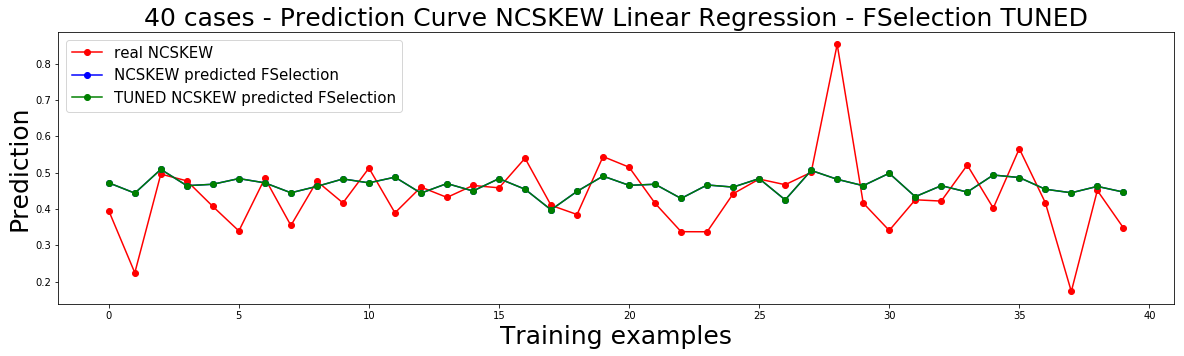

In [139]:
tuned_flinear_reg_model_NCSKEW = LinearRegression(linear_reg_model_hyper_NCSKEW.best_params_)
tuned_flinear_reg_model_NCSKEW.fit(selected_input_train, Y_train_NCSKEW)

print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW, flinear_reg_model_NCSKEW.predict(selected_input_test)))
print('NCSKEW Median Absolute Error TUNED', median_absolute_error(Y_test_NCSKEW,tuned_flinear_reg_model_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW, flinear_reg_model_NCSKEW.predict(selected_input_test)))
print('NCSKEW Mean Squared Error TUNED', mse(Y_test_NCSKEW, tuned_flinear_reg_model_NCSKEW.predict(selected_input_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, flinear_reg_model_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_flinear_reg_model_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

### NCSKEW - Simple Vector Regression

In [216]:
alg ='Simple Vector Regression - FSelection TUNED'
print("-----------------------------------> "+ alg)

#--------------------TUNING

cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params= { 
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [5,6,8],#1,2,5,3,4,
            'gamma': [0.01, 0.05, 0.1, 0.2, "auto"],#0.0001, 0.001, 1, 3, 5
            'C': [30,80, 100], # 0.1 1000, 60,100, 10, 30
            'epsilon': [0.05, 0.1, 5] #0.0001, 0.0005, 0.001, 0.005 , 0.1,0.5, 1, 5, 10
}
           
svreg_hyper_NCSKEW = GridSearchCV(svreg_NCSKEW, my_params, cv = cv)
svreg_hyper_NCSKEW.fit(X_train, Y_train_NCSKEW)

print("-"*10)
print(svreg_hyper_NCSKEW.best_params_)
#print(svreg_hyper_NCSKEW.best_score_)
#print(svreg_hyper_NCSKEW.best_estimator_.score(X_train, Y_train_NCSKEW))
#-------------------------TUNING

-----------------------------------> Simple Vector Regression - FSelection TUNED
----------
{'C': 30, 'degree': 5, 'epsilon': 5, 'gamma': 0.01, 'kernel': 'linear'}


---- 
NCSKEW Median Absolute Error 0.04470691756515255
NCSKEW Median Absolute Error TUNED 0.04593529898655696
----
NCSKEW Mean Squared Error 0.01623321083876619
NCSKEW Mean Squared Error TUNED 0.01618057922155741


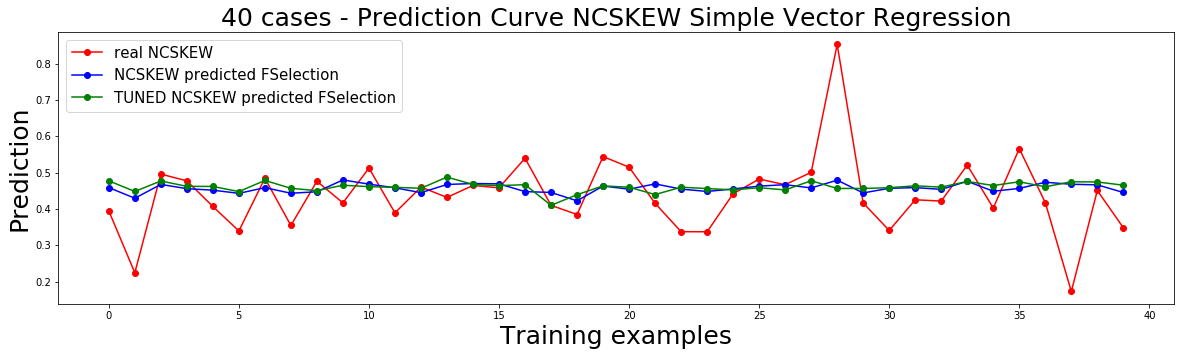

In [42]:
tuned_svreg_NCSKEW = svm.SVR(C= 80, degree= 5, gamma= 0.001, kernel= 'rbf')
tuned_svreg_NCSKEW.fit(X_train, Y_train_NCSKEW)

print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW, svreg_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error TUNED', median_absolute_error(Y_test_NCSKEW,tuned_svreg_NCSKEW.predict(X_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW, svreg_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error TUNED', mse(Y_test_NCSKEW, tuned_svreg_NCSKEW.predict(X_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, svreg_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_svreg_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

### NCSKEW - Multi-Layer-Perceptron model

In [146]:
alg = 'Multi-Layer-Perceptron model - TUNED'
print("-----------------------------------> "+ alg)

#--------------------TUNING
cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params = {
    'hidden_layer_sizes': [(100,100,100), (100,50,50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'max_iter': [400],
    #'alpha': [0.0001, 0.005],
    'learning_rate': ['adaptive'],#'constant',
}
           
clf_hyper_NCSKEW = GridSearchCV(clf_NCSKEW, my_params, cv = cv)
clf_hyper_NCSKEW.fit(X_train, Y_train_NCSKEW)

print("-"*10)
print(clf_hyper_NCSKEW.best_params_)
#print(clf_hyper_NCSKEW.best_score_)
#print(clf_hyper_NCSKEW.best_estimator_.score(X_train, Y_train_NCSKEW))
#-------------------------TUNING

-----------------------------------> Multi-Layer-Perceptron model - TUNED
----------
{'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'max_iter': 400, 'solver': 'sgd'}


----
NCSKEW Median Absolute Error 0.046340148165256057
NCSKEW Median Absolute Error TUNED 0.04627341090079465
----
NCSKEW Mean Squared Error 0.016364006197213333
NCSKEW Mean Squared Error TUNED 0.0157719941048207


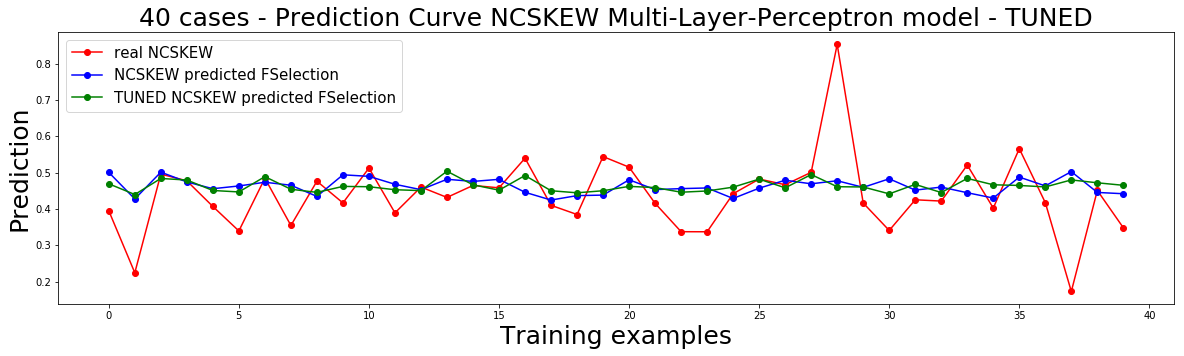

In [172]:
#'activation': 'tanh', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'max_iter': 400, 'solver': 'sgd'
#{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'sgd'}
#'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'
#{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 100, 100, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}
tuned_clf_NCSKEW = MLPRegressor(activation= 'tanh', hidden_layer_sizes= (100, 100, 100), max_iter=400, learning_rate= 'adaptive', solver= 'sgd')
tuned_clf_NCSKEW.fit(X_train, Y_train_NCSKEW)

print('----')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW, clf_NCSKEW.predict(X_test)))
print('NCSKEW Median Absolute Error TUNED', median_absolute_error(Y_test_NCSKEW,tuned_clf_NCSKEW.predict(X_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW, clf_NCSKEW.predict(X_test)))
print('NCSKEW Mean Squared Error TUNED', mse(Y_test_NCSKEW, tuned_clf_NCSKEW.predict(X_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, clf_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_clf_NCSKEW.predict(X_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

### NCSKEW - Gradient Boosting Regressor with feature selection

In [174]:
alg = 'Gradient Boosting Regressor - FSelection TUNED'
print("-----------------------------------> "+ alg)

#Selected by rfe
seleted_columns = ['ARI','ARI.simple','ARI.NRI','Bormuth.MC','Bormuth.GP','Coleman',
 'Coleman.C2','Coleman.Liau.ECP','Coleman.Liau.grade','Coleman.Liau.short',
 'Dale.Chall','Dale.Chall.old','Dale.Chall.PSK','Danielson.Bryan',
 'Danielson.Bryan.2','Dickes.Steiwer','ELF','Flesch','Flesch.PSK',
 'Flesch.Kincaid','FOG','FOG.NRI','FORCAST','FORCAST.RGL','Linsear.Write',
 'LIW','nWS','nWS.2','nWS.3','nWS.4','RIX','Scrabble','SMOG','SMOG.de',
 'Spache','Spache.old','Strain','Traenkle.Bailer.2','Wheeler.Smith',
 'meanWordSyllables']
selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

print('Features selected by RFE:') 
print('Feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)

#--------------------TUNING

cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params = [
  {'fit_intercept': [True, False], 
   'normalize': [True, False]}
 ]

my_params= {'n_estimators':[100,200,300], 
            'learning_rate': [0.1, 0.05, 0.01, 0.001],# 0.1, 0.05, 0.02, 0.01
            'max_depth':[1,3,5,15,30],#4,6], 
            'min_samples_leaf':[0.5,1,3,5],#[3,5,9,17
            'max_features':[1.0,0.3,0.1,0.05,0.01],#1.0,0.3,0.1
           }
           
gbr_hyper_NCSKEW = GridSearchCV(fgbr_NCSKEW, my_params, cv = cv)
gbr_hyper_NCSKEW.fit(selected_input_train, Y_train_NCSKEW)

print("-"*10)
print(gbr_hyper_NCSKEW.best_params_)
#print(gbr_hyper_NCSKEW.best_score_)
#print(gbr_hyper_NCSKEW.best_estimator_.score(X_train, Y_train_NCSKEW))
#-------------------------TUNING

-----------------------------------> Gradient Boosting Regressor - FSelection TUNED
Features selected by RFE:
Feature number:  40
Feature names:  ['ARI', 'ARI.simple', 'ARI.NRI', 'Bormuth.MC', 'Bormuth.GP', 'Coleman', 'Coleman.C2', 'Coleman.Liau.ECP', 'Coleman.Liau.grade', 'Coleman.Liau.short', 'Dale.Chall', 'Dale.Chall.old', 'Dale.Chall.PSK', 'Danielson.Bryan', 'Danielson.Bryan.2', 'Dickes.Steiwer', 'ELF', 'Flesch', 'Flesch.PSK', 'Flesch.Kincaid', 'FOG', 'FOG.NRI', 'FORCAST', 'FORCAST.RGL', 'Linsear.Write', 'LIW', 'nWS', 'nWS.2', 'nWS.3', 'nWS.4', 'RIX', 'Scrabble', 'SMOG', 'SMOG.de', 'Spache', 'Spache.old', 'Strain', 'Traenkle.Bailer.2', 'Wheeler.Smith', 'meanWordSyllables']
----------
{'learning_rate': 0.001, 'max_depth': 1, 'max_features': 0.01, 'min_samples_leaf': 0.5, 'n_estimators': 100}


---- 
NCSKEW Median Absolute Error 0.05261852244508189
NCSKEW Median Absolute Error TUNED 0.048886664831483434
----
NCSKEW Mean Squared Error 0.017023530162187918
NCSKEW Mean Squared Error TUNED 0.01727732643606292


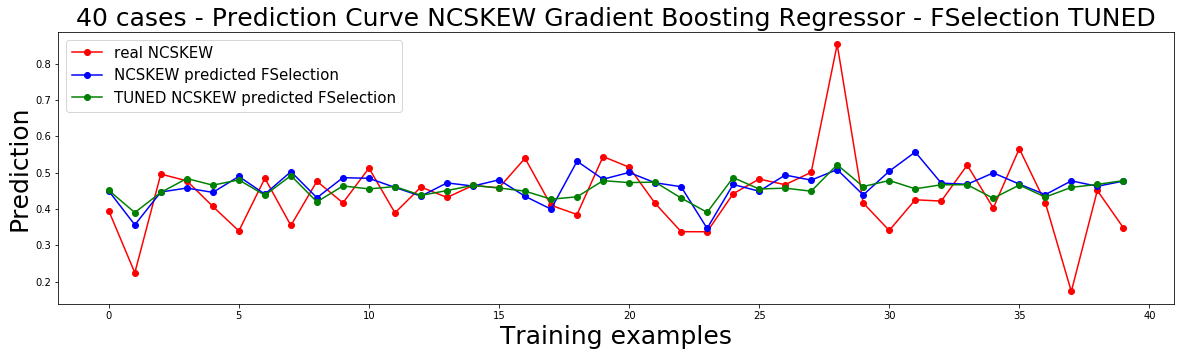

In [191]:
#{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 0.1, 'min_samples_leaf': 1, 'n_estimators': 100}
tuned_fgbr_NCSKEW = GradientBoostingRegressor(learning_rate= 0.05, max_depth= 5, max_features= 0.1, min_samples_leaf= 1, n_estimators= 100)
tuned_fgbr_NCSKEW.fit(selected_input_train, Y_train_NCSKEW)

print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW, fgbr_NCSKEW.predict(selected_input_test)))
print('NCSKEW Median Absolute Error TUNED', median_absolute_error(Y_test_NCSKEW,tuned_fgbr_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW, fgbr_NCSKEW.predict(selected_input_test)))
print('NCSKEW Mean Squared Error TUNED', mse(Y_test_NCSKEW, tuned_fgbr_NCSKEW.predict(selected_input_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, fgbr_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_fgbr_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

### NCSKEW - Random Florest with feature selection

In [193]:
alg = 'Random Florest - FSelection TUNED'
print("-----------------------------------> "+ alg)

#Selected by rfe
seleted_columns = ['Coleman','Coleman.C2','Dale.Chall','Dale.Chall.old','Danielson.Bryan.2',
 'ELF','Flesch','FOG.NRI','FORCAST.RGL','LIW','nWS','nWS.3','Scrabble',
 'Spache','Traenkle.Bailer.2','meanWordSyllables']
selected_input_train = X_train[seleted_columns]
selected_input_test = X_test[seleted_columns]

print('Features selected by RFE:') 
print('Feature number: ', X_train[seleted_columns].shape[1]) 
print('Feature names: ', seleted_columns)

#--------------------TUNING

cv= model_selection.ShuffleSplit(n_splits = 1, test_size = .2, train_size = .8, random_state = seed )

my_params= {'n_estimators':[100,200,300], 
            'criterion': ["mse", "mae"],
            #'max_depth':[1,3,5,15,30],
            'min_samples_leaf':[0.5,1,3,5],
            'max_features':["auto"],#20,10,1.0,0.3,0.1,0.05,0.01,
           }
           
forest_regressor_hyper_NCSKEW = GridSearchCV(fforest_regressor_NCSKEW, my_params, cv = cv)
forest_regressor_hyper_NCSKEW.fit(selected_input_train, Y_train_NCSKEW)

print("-"*10)
print(forest_regressor_hyper_NCSKEW.best_params_)
#print(forest_regressor_hyper_NCSKEW.best_score_)
#print(forest_regressor_hyper_NCSKEW.best_estimator_.score(X_train, Y_train_NCSKEW))
#-------------------------TUNING

-----------------------------------> Random Florest - FSelection TUNED
Features selected by RFE:
Feature number:  16
Feature names:  ['Coleman', 'Coleman.C2', 'Dale.Chall', 'Dale.Chall.old', 'Danielson.Bryan.2', 'ELF', 'Flesch', 'FOG.NRI', 'FORCAST.RGL', 'LIW', 'nWS', 'nWS.3', 'Scrabble', 'Spache', 'Traenkle.Bailer.2', 'meanWordSyllables']
----------
{'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 0.5, 'n_estimators': 100}


---- 
NCSKEW Median Absolute Error 0.05356984677800536
NCSKEW Median Absolute Error TUNED 0.047633137723433
----
NCSKEW Mean Squared Error 0.017806076312648498
NCSKEW Mean Squared Error TUNED 0.016796069090185065


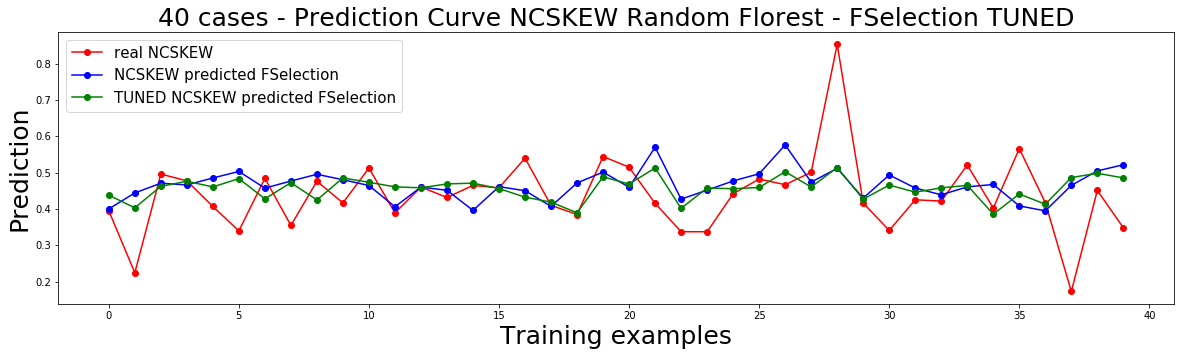

In [210]:
#{'criterion': 'mae', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 0.5, 'n_estimators': 300}
tuned_fforest_regressor_NCSKEW = RandomForestRegressor(criterion= 'mae', max_features='auto', min_samples_leaf= 1, n_estimators= 100)
tuned_fforest_regressor_NCSKEW.fit(selected_input_train, Y_train_NCSKEW)

print('---- ')
print('NCSKEW Median Absolute Error', median_absolute_error(Y_test_NCSKEW, fforest_regressor_NCSKEW.predict(selected_input_test)))
print('NCSKEW Median Absolute Error TUNED', median_absolute_error(Y_test_NCSKEW,tuned_fforest_regressor_NCSKEW.predict(selected_input_test)))
print('----')
print('NCSKEW Mean Squared Error', mse(Y_test_NCSKEW, fforest_regressor_NCSKEW.predict(selected_input_test)))
print('NCSKEW Mean Squared Error TUNED', mse(Y_test_NCSKEW, tuned_fforest_regressor_NCSKEW.predict(selected_input_test)))

plt.figure(figsize=(20,5))
plt.title("40 cases - Prediction Curve NCSKEW " + alg, fontsize = 25)
plt.xlabel("Training examples",fontsize = 25)
plt.ylabel("Prediction", fontsize = 25)
plt.plot(X_test[0:40].reset_index().index, Y_test_NCSKEW[0:40], 'o-', color = 'r', label = 'real NCSKEW')
plt.plot(X_test[0:40].reset_index().index, fforest_regressor_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'b', label = "NCSKEW predicted FSelection")
plt.plot(X_test[0:40].reset_index().index, tuned_fforest_regressor_NCSKEW.predict(selected_input_test)[0:40] , 'o-', color = 'g', label = "TUNED NCSKEW predicted FSelection")

plt.legend(fontsize = 15)
plt.show()

## Save results, data and algorithms

In [140]:
# import pickle
# s = pickle.dumps(clf)
# clf2 = pickle.loads(s)
# clf2.predict(X[0:1])
# array([0])
# y[0]

from joblib import dump, load

dump(X_train, 'X_train.joblib') 
dump(X_test, 'X_test.joblib') 
dump(Y_train, 'Y_train.joblib') 
dump(Y_test, 'Y_test.joblib') 
dump(results_mse, 'results_mse.joblib') 
dump(results_error, 'results_error.joblib') 
dump(results_r2, 'results_r2.joblib') 
dump(results_mse_fs, 'results_mse_fs.joblib') 
dump(results_error_fs, 'results_error_fs.joblib') 
dump(results_r2_fs, 'results_r2_fs.joblib') 

#clf = load('filename.joblib') 

['results_r2_fs.joblib']

In [215]:
dump(tuned_flinear_reg_model_NCSKEW, 'tuned_flinear_reg_model_NCSKEW.joblib') 
dump(tuned_svreg_NCSKEW, 'tuned_svreg_NCSKEW.joblib') 
dump(tuned_clf_NCSKEW, 'tuned_clf_NCSKEW.joblib') 
dump(tuned_fgbr_NCSKEW, 'tuned_fgbr_NCSKEW.joblib') 
dump(tuned_fforest_regressor_NCSKEW, 'tuned_fforest_regressor_NCSKEW.joblib') 

['tuned_fforest_regressor_NCSKEW.joblib']

In [11]:
from joblib import dump, load
X_train = load('X_train.joblib') 
X_test = load('X_test.joblib') 
Y_train = load('Y_train.joblib') 
Y_test = load('Y_test.joblib') 